# Task
 To perform comprehensive exploratory data analysis on the dataset, including data cleaning, preparation, descriptive statistics, univariate, bivariate, temporal, and geographic analysis, and feature engineering. Then, prepare the data for machine learning, build and train multiple models to predict ride prices, evaluate their performance, and summarize the findings.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
!pip install catboost # Install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lagos_ride_dataset.csv')
display(df.head())

ride_id  customer_id ride_order_timestamp ride_takeoff_timestamp  \
0  RIDE_00008679  CUST_001840  2024-01-01 00:48:49    2024-01-01 00:56:49   
1  RIDE_00012194  CUST_003517  2024-01-01 01:05:24    2024-01-01 01:14:24   
2  RIDE_00015931  CUST_002723  2024-01-01 01:09:50    2024-01-01 01:24:50   
3  RIDE_00006115  CUST_013114  2024-01-01 02:10:20    2024-01-01 02:19:20   
4  RIDE_00025347  CUST_010897  2024-01-01 02:19:04    2024-01-01 02:34:04   

  pickup_location dropoff_location  pickup_latitude  pickup_longitude  \
0    Oshodi-Isolo         Alimosho         6.538020          3.322390   
1         Badagry          Eti-Osa         6.434274          2.929438   
2  Lagos Mainland          Badagry         6.521396          3.342150   
3    Lagos Island      Ibeju-Lekki         6.481557          3.425180   
4         Eti-Osa         Surulere         6.438681          3.451830   

   dropoff_latitude  dropoff_longitude  distance_km  \
0          6.623844           3.307955         9.68   
1          6.401178           3.476332        60.54   
2          6.396760           2.916094        49.07   
3          6.496539           3.802438        41.71   
4          6.542341           3.393765        13.19   

   estimated_duration_minutes   car_type car_brand car_model  \
0                        19.2  Executive      Audi        A8   
1                       152.2    Economy   Hyundai   Elantra   
2                       210.4    Premium     Lexus        ES   
3                       104.4    Comfort    Toyota     Camry   
4                        34.4    Comfort    Toyota     Camry   

   passengers_count   weather_type  precipitation_mm  humidity_percent  \
0                 1  Partly Cloudy               2.6              66.9   
1                 1         Cloudy               1.5              59.0   
2                 1          Rainy              14.5              91.3   
3                 1         Cloudy               1.0              76.0   
4                 3          Sunny               0.0              61.0   

  traffic_type  hour_of_day  day_of_week  is_weekend  is_rush_hour  month  \
0     Moderate            0            0       False         False      1   
1     Moderate            1            0       False         False      1   
2   Very Heavy            1            0       False         False      1   
3     Moderate            2            0       False         False      1   
4        Light            2            0       False         False      1   

  customer_occupation customer_marital_status payment_method  driver_rating  \
0             Student                Divorced         Wallet            5.0   
1              Trader                 Widowed           Card            3.8   
2       Civil Servant                 Widowed           Card            4.6   
3             Teacher                Divorced  Bank Transfer            3.8   
4              Banker                  Single  Bank Transfer            4.6   

   ride_price_naira  
0           2319.28  
1           4064.56  
2          11490.41  
3           4242.88  
4           1417.05

## Data cleaning and preparation: Handling missing values, incorrect data types, and other data quality issues. Converting timestamp columns to datetime objects.


In [ ]:
# Checking initial data types and missing values
display(df.info())
display(df.isnull().sum())

# Convert timestamp columns to datetime objects
df['ride_order_timestamp'] = pd.to_datetime(df['ride_order_timestamp'])
df['ride_takeoff_timestamp'] = pd.to_datetime(df['ride_takeoff_timestamp'])

# Check data types and missing values again to confirm changes
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37800 entries, 0 to 37799
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ride_id                     37800 non-null  object 
 1   customer_id                 37800 non-null  object 
 2   ride_order_timestamp        37800 non-null  object 
 3   ride_takeoff_timestamp      37800 non-null  object 
 4   pickup_location             37800 non-null  object 
 5   dropoff_location            37800 non-null  object 
 6   pickup_latitude             37800 non-null  float64
 7   pickup_longitude            37800 non-null  float64
 8   dropoff_latitude            37800 non-null  float64
 9   dropoff_longitude           37800 non-null  float64
 10  distance_km                 37800 non-null  float64
 11  estimated_duration_minutes  37800 non-null  float64
 12  car_type                    37800 non-null  object 
 13  car_brand                   378

None

ride_id                       0
customer_id                   0
ride_order_timestamp          0
ride_takeoff_timestamp        0
pickup_location               0
dropoff_location              0
pickup_latitude               0
pickup_longitude              0
dropoff_latitude              0
dropoff_longitude             0
distance_km                   0
estimated_duration_minutes    0
car_type                      0
car_brand                     0
car_model                     0
passengers_count              0
weather_type                  0
precipitation_mm              0
humidity_percent              0
traffic_type                  0
hour_of_day                   0
day_of_week                   0
is_weekend                    0
is_rush_hour                  0
month                         0
customer_occupation           0
customer_marital_status       0
payment_method                0
driver_rating                 0
ride_price_naira              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37800 entries, 0 to 37799
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ride_id                     37800 non-null  object        
 1   customer_id                 37800 non-null  object        
 2   ride_order_timestamp        37800 non-null  datetime64[ns]
 3   ride_takeoff_timestamp      37800 non-null  datetime64[ns]
 4   pickup_location             37800 non-null  object        
 5   dropoff_location            37800 non-null  object        
 6   pickup_latitude             37800 non-null  float64       
 7   pickup_longitude            37800 non-null  float64       
 8   dropoff_latitude            37800 non-null  float64       
 9   dropoff_longitude           37800 non-null  float64       
 10  distance_km                 37800 non-null  float64       
 11  estimated_duration_minutes  37800 non-null  float64   

None

ride_id                       0
customer_id                   0
ride_order_timestamp          0
ride_takeoff_timestamp        0
pickup_location               0
dropoff_location              0
pickup_latitude               0
pickup_longitude              0
dropoff_latitude              0
dropoff_longitude             0
distance_km                   0
estimated_duration_minutes    0
car_type                      0
car_brand                     0
car_model                     0
passengers_count              0
weather_type                  0
precipitation_mm              0
humidity_percent              0
traffic_type                  0
hour_of_day                   0
day_of_week                   0
is_weekend                    0
is_rush_hour                  0
month                         0
customer_occupation           0
customer_marital_status       0
payment_method                0
driver_rating                 0
ride_price_naira              0
dtype: int64


Select the numerical columns and calculate their descriptive statistics.



In [ ]:
numerical_cols = df.select_dtypes(include=['number'])
display(numerical_cols.describe())

pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
count     37800.000000      37800.000000      37800.000000       37800.000000   
mean          6.521563          3.380130          6.520812           3.379205   
std           0.079221          0.222617          0.079662           0.219399   
min           6.366705          2.833388          6.366732           2.833338   
25%           6.457580          3.297105          6.455936           3.297493   
50%           6.510921          3.350652          6.508748           3.350683   
75%           6.580856          3.411436          6.580199           3.409970   
max           6.733278          4.033232          6.733241           4.033283   

        distance_km  estimated_duration_minutes  passengers_count  \
count  37800.000000                37800.000000      37800.000000   
mean      28.272578                   85.980333          1.741270   
std       23.528160                   76.203090          0.992066   
min        0.500000                    5.000000          1.000000   
25%       10.770000                   31.900000          1.000000   
50%       19.790000                   58.400000          1.000000   
75%       44.265000                  118.200000          3.000000   
max      133.950000                  569.900000          4.000000   

       precipitation_mm  humidity_percent   hour_of_day   day_of_week  \
count      37800.000000      37800.000000  37800.000000  37800.000000   
mean           4.433286         67.643876     11.471005      2.971958   
std            6.784268         13.673026      6.885814      2.001364   
min            0.000000         40.000000      0.000000      0.000000   
25%            0.000000         57.700000      6.000000      1.000000   
50%            1.400000         66.500000     11.000000      3.000000   
75%            3.000000         78.000000     17.000000      5.000000   
max           25.000000         95.000000     23.000000      6.000000   

              month  driver_rating  ride_price_naira  
count  37800.000000   37800.000000      37800.000000  
mean       5.579259       4.252902       4902.453599  
std        3.227203       0.435706       5503.812831  
min        1.000000       3.500000        137.260000  
25%        3.000000       3.900000       1379.662500  
50%        5.000000       4.300000       2892.320000  
75%        8.000000       4.600000       6401.810000  
max       12.000000       5.000000      74410.040000

Analyzing the distributions of individual variables using visualizations (histograms, box plots) and summary statistics.Then generate histograms and box plots for all numerical columns to visualize their distributions and identify potential outliers.



Generating Histograms...


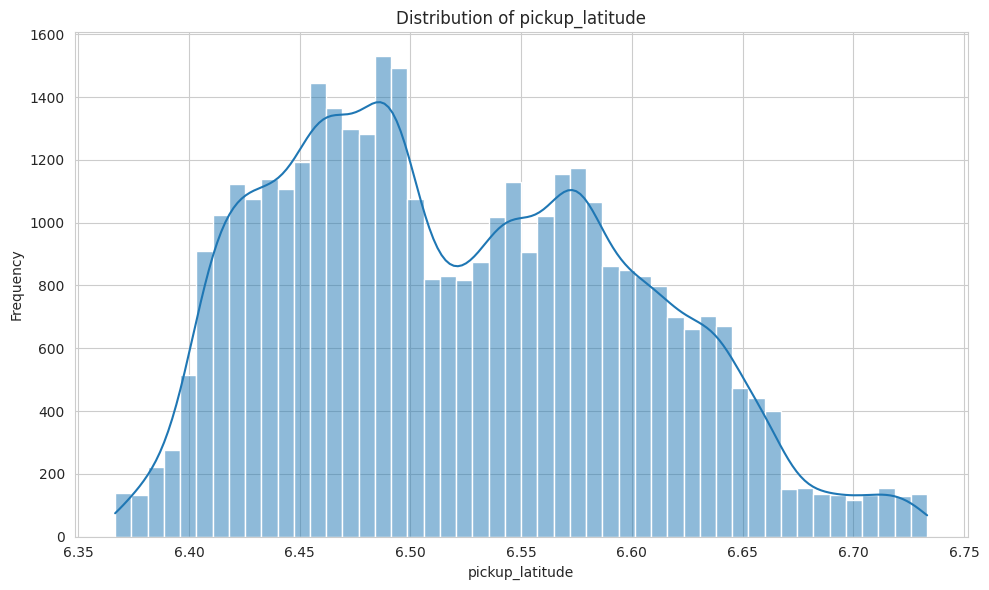

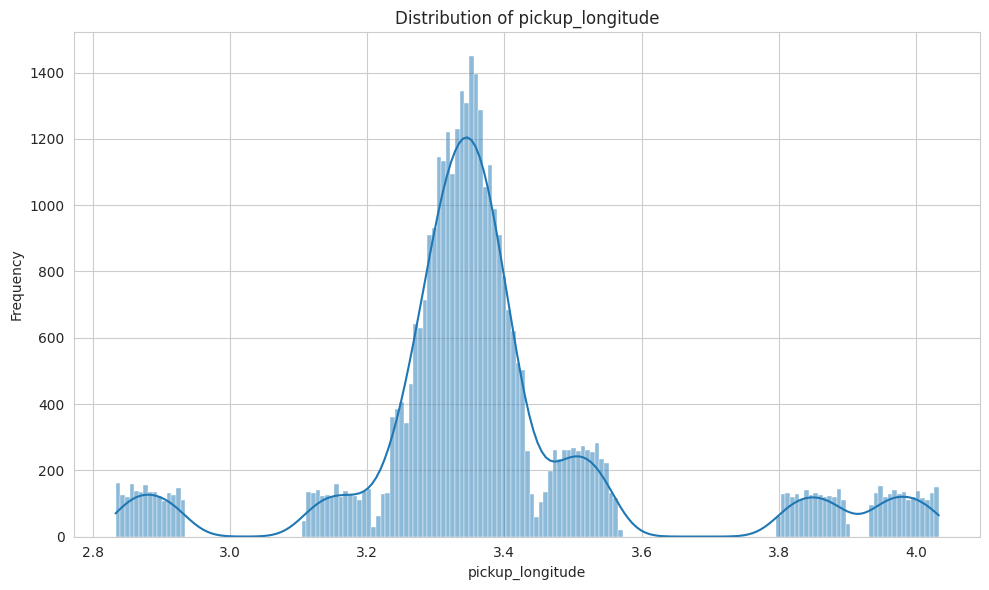

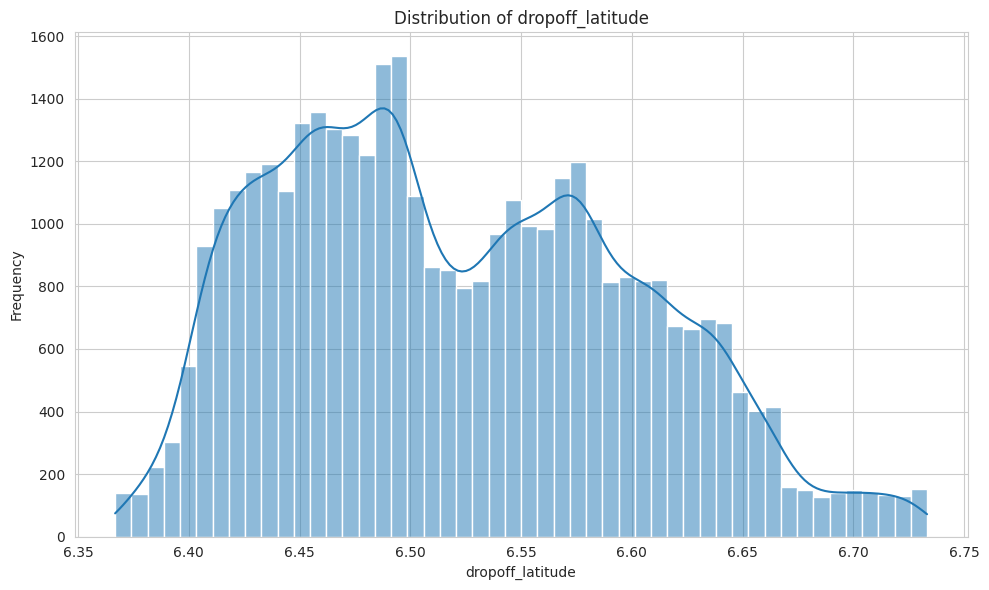

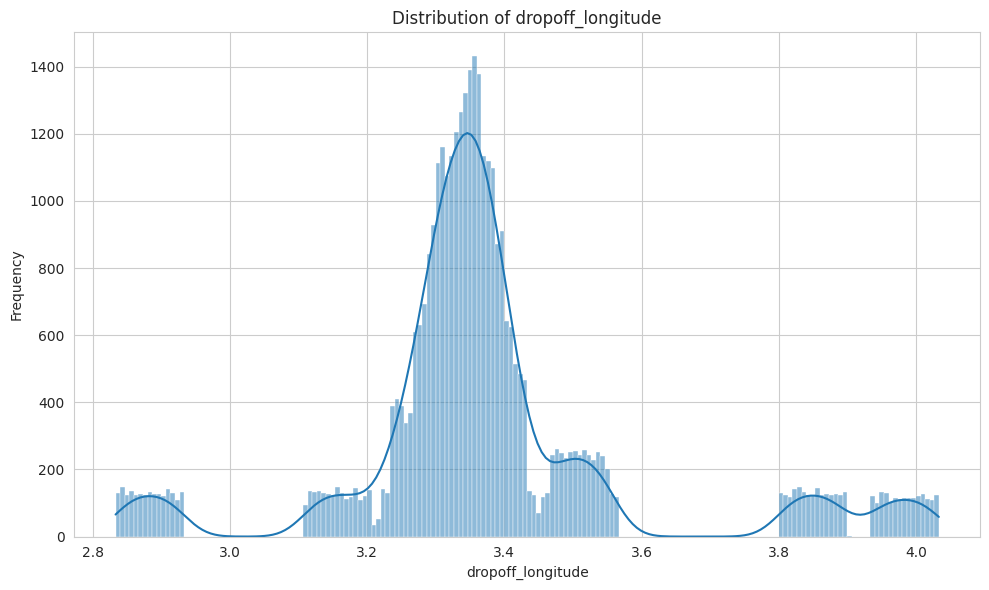

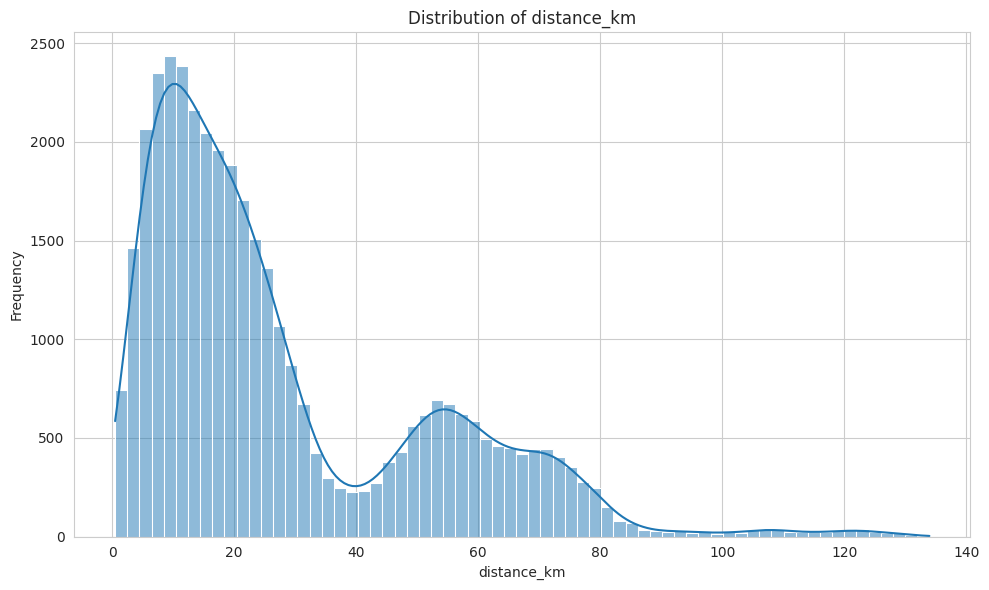

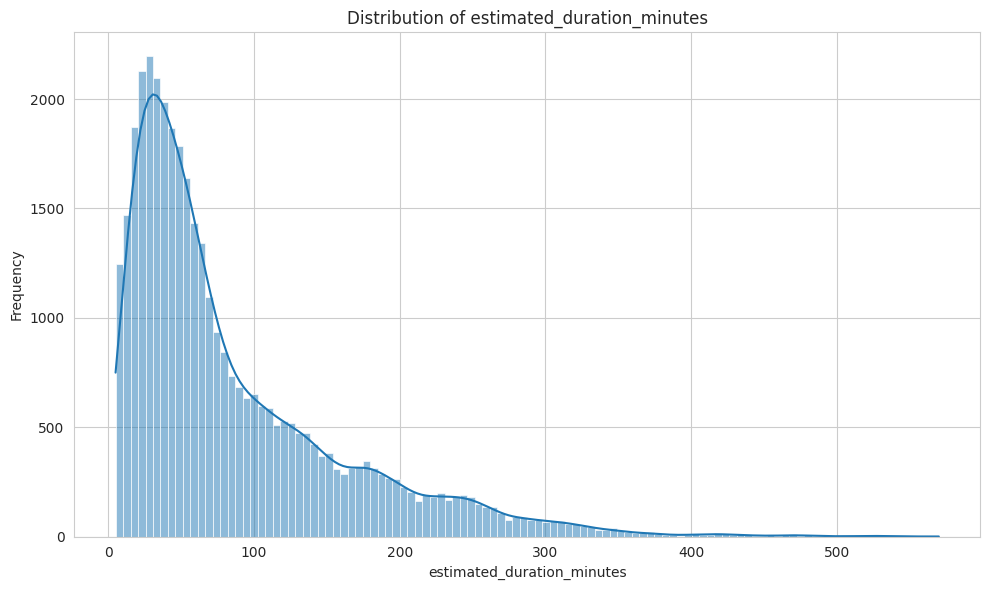

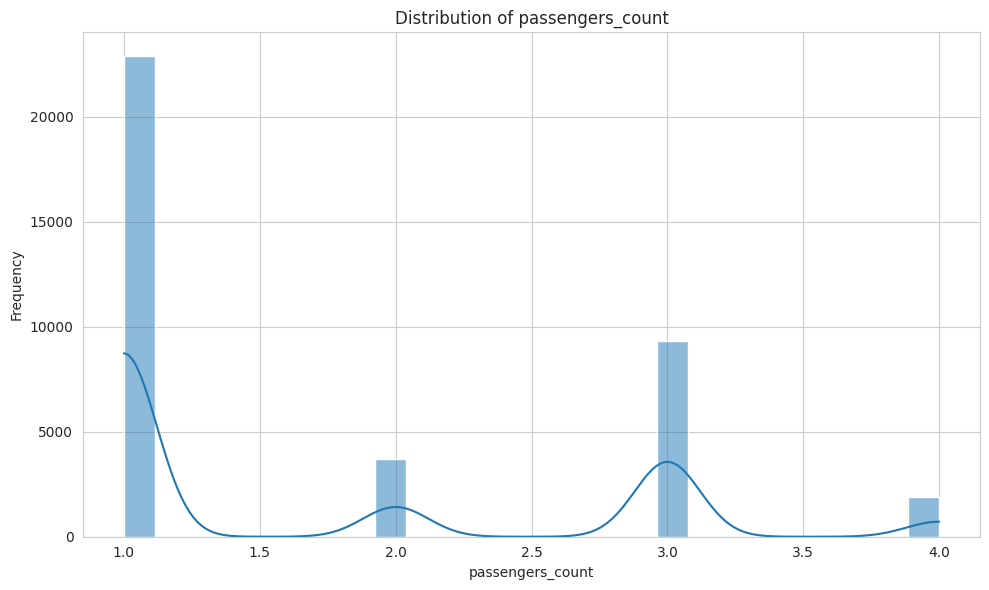

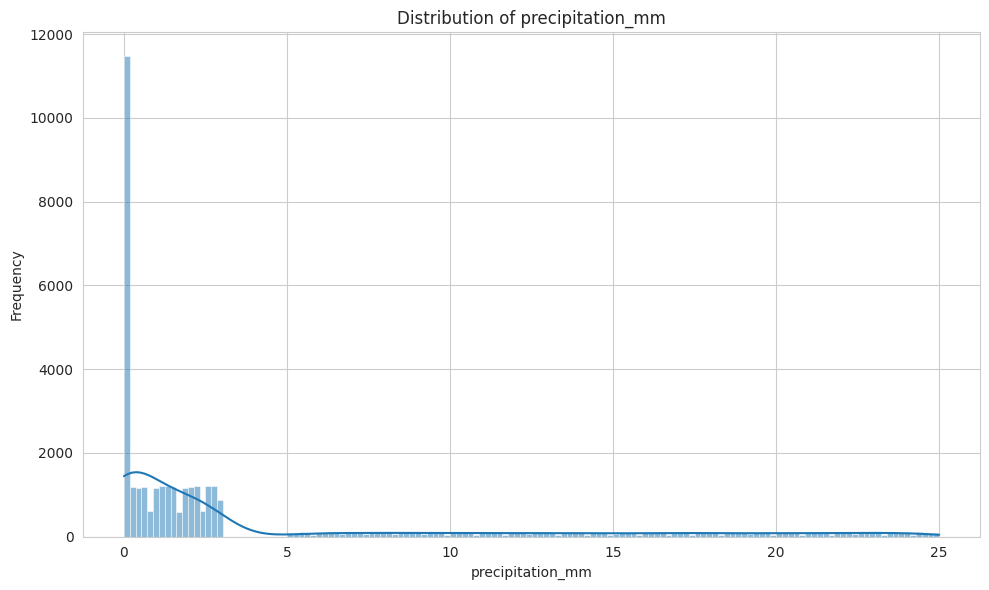

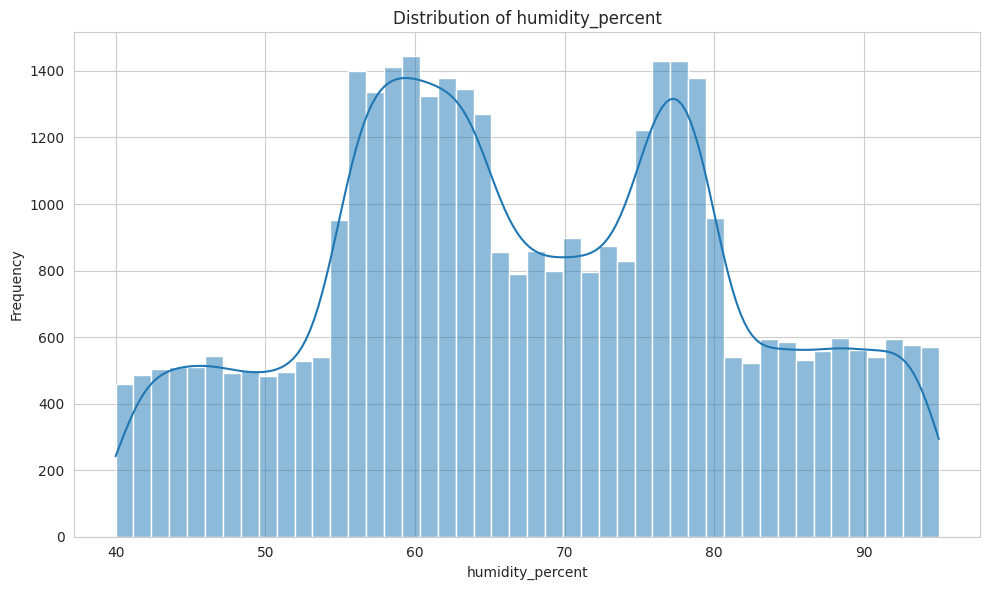

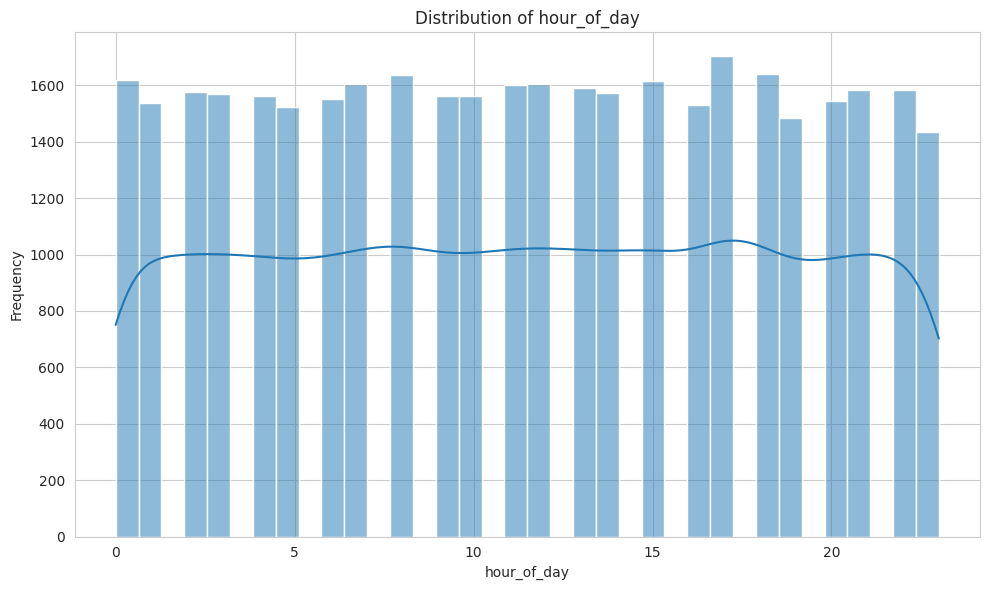

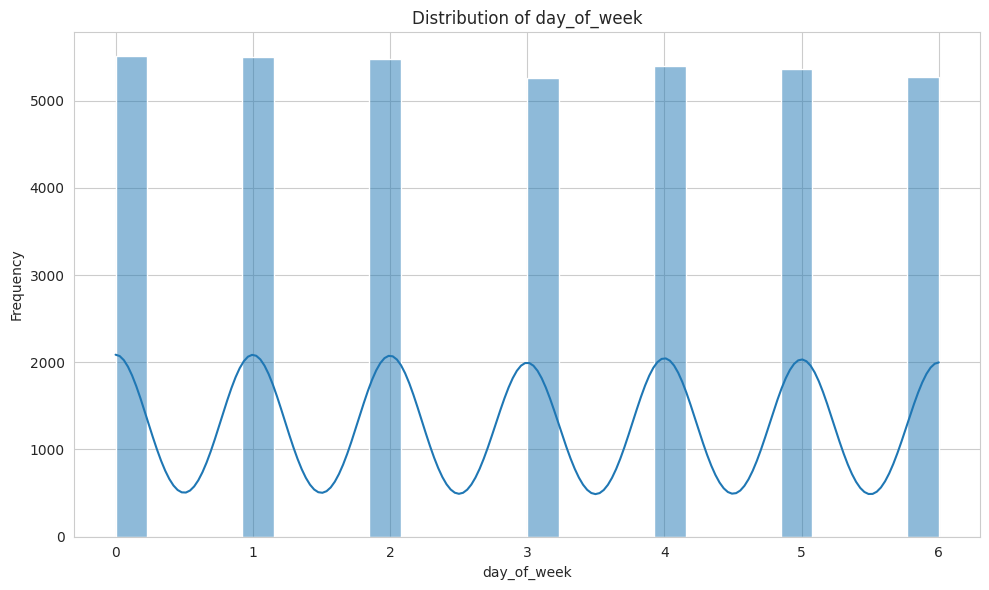

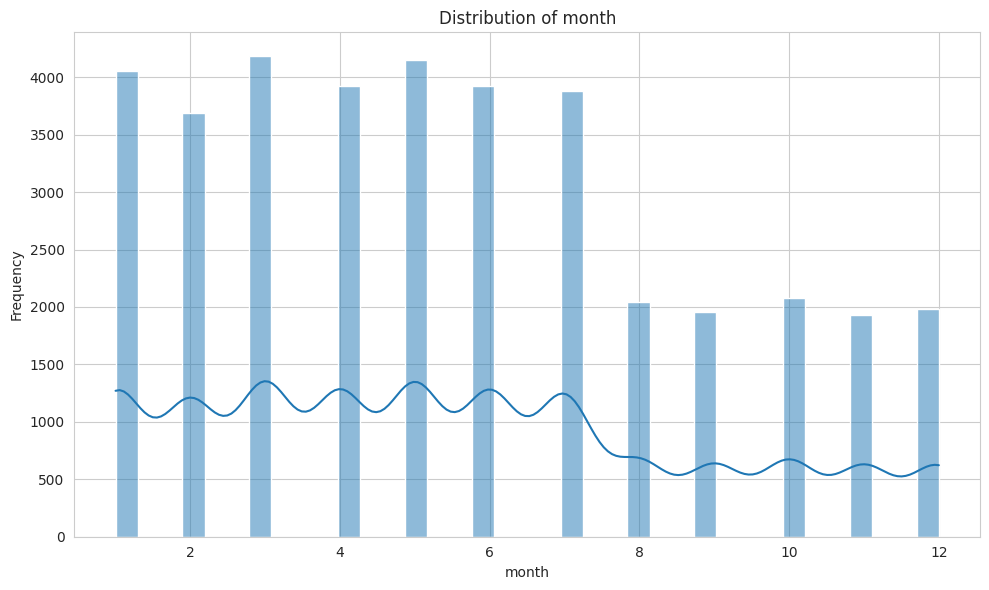

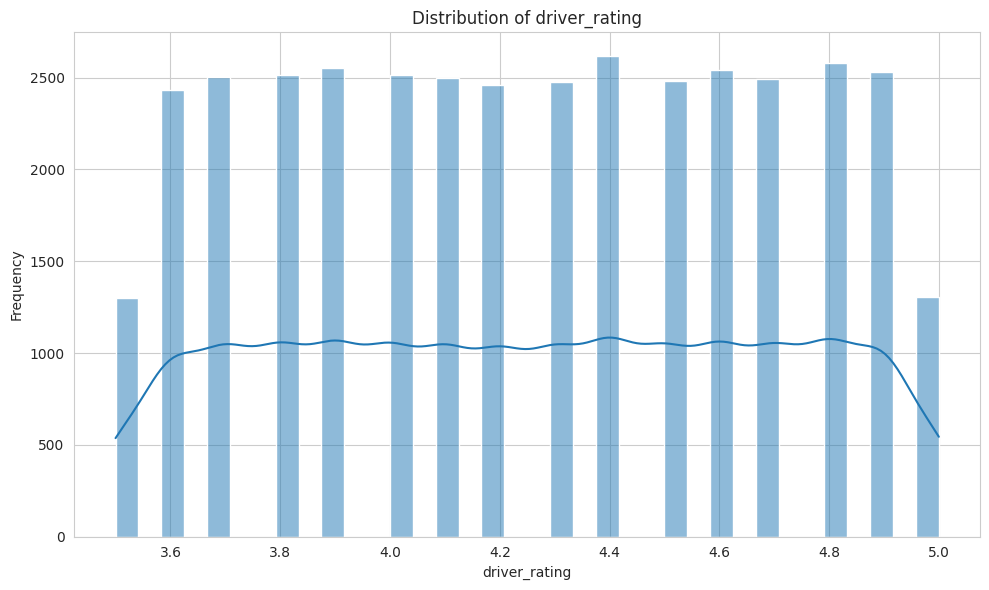

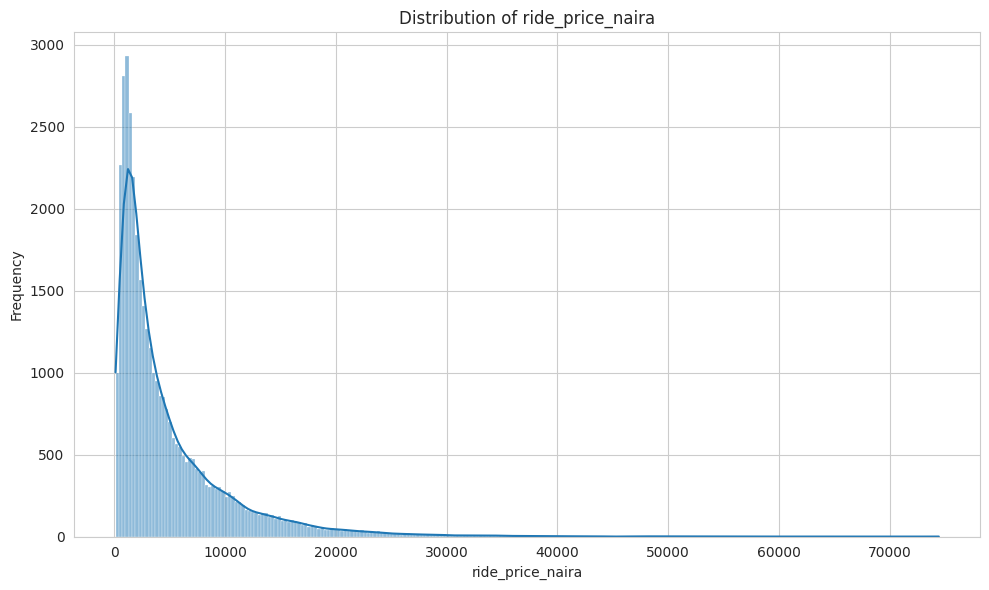

Generating Box Plots...


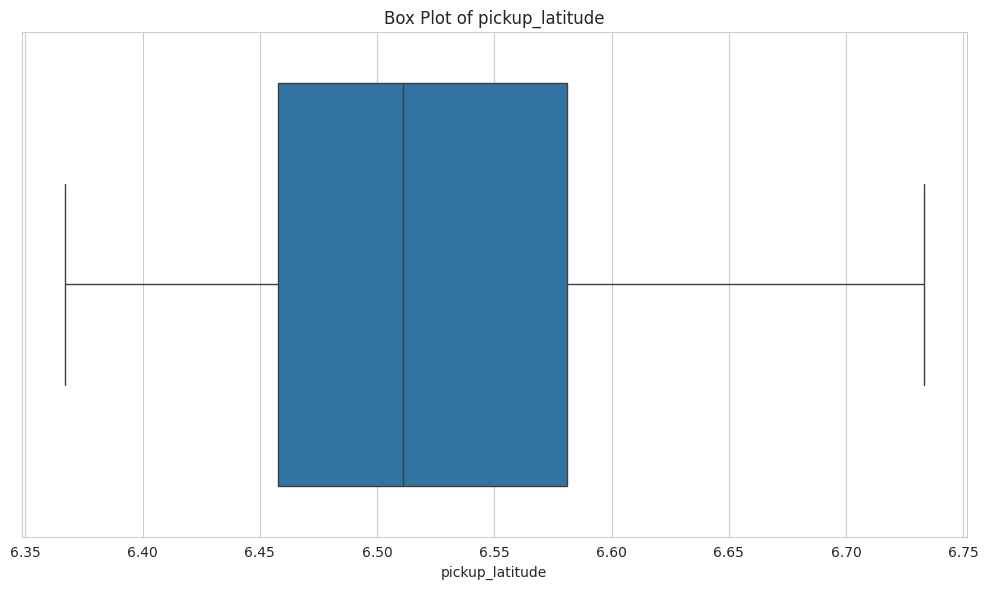

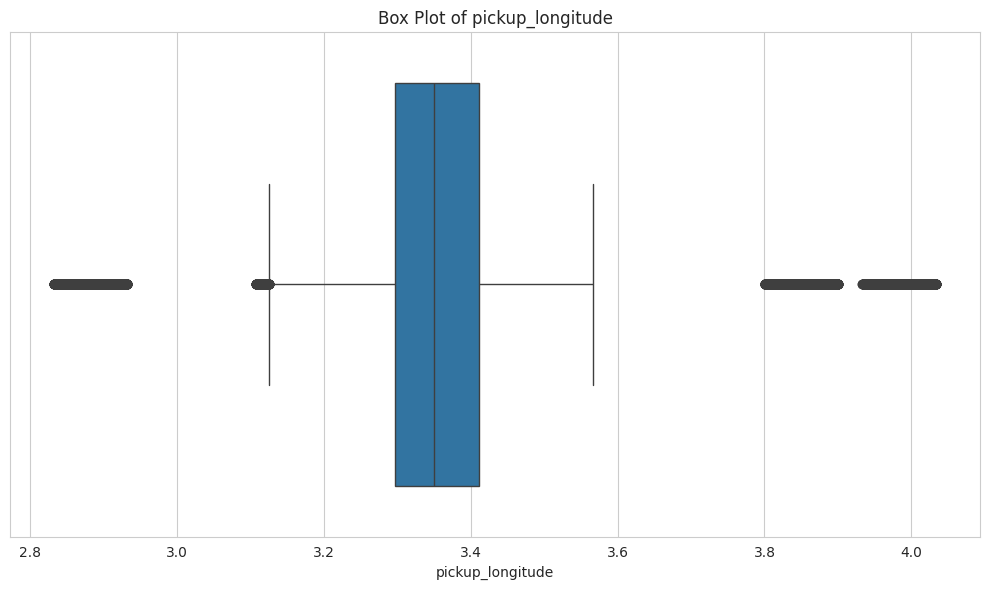

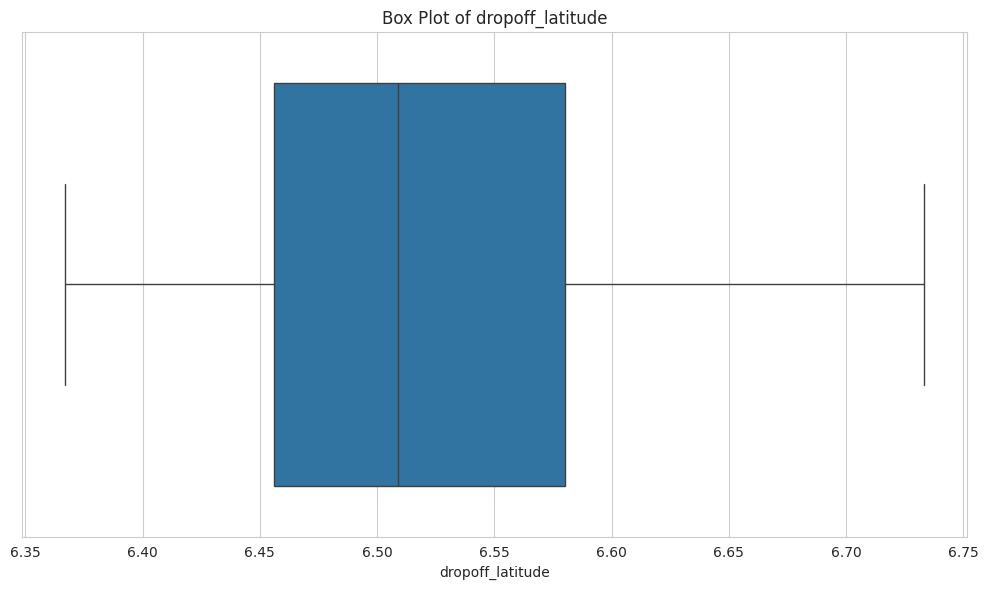

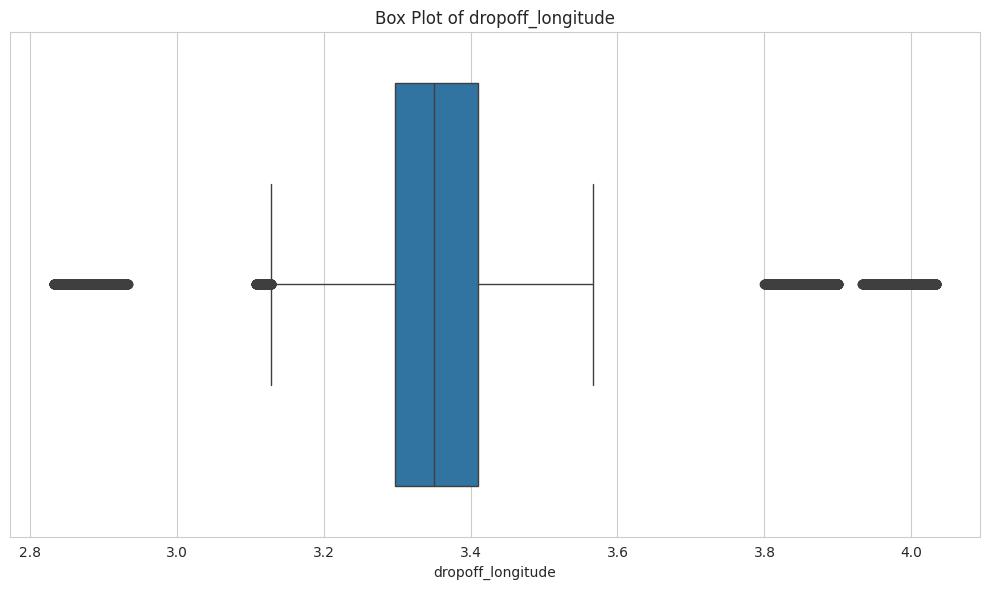

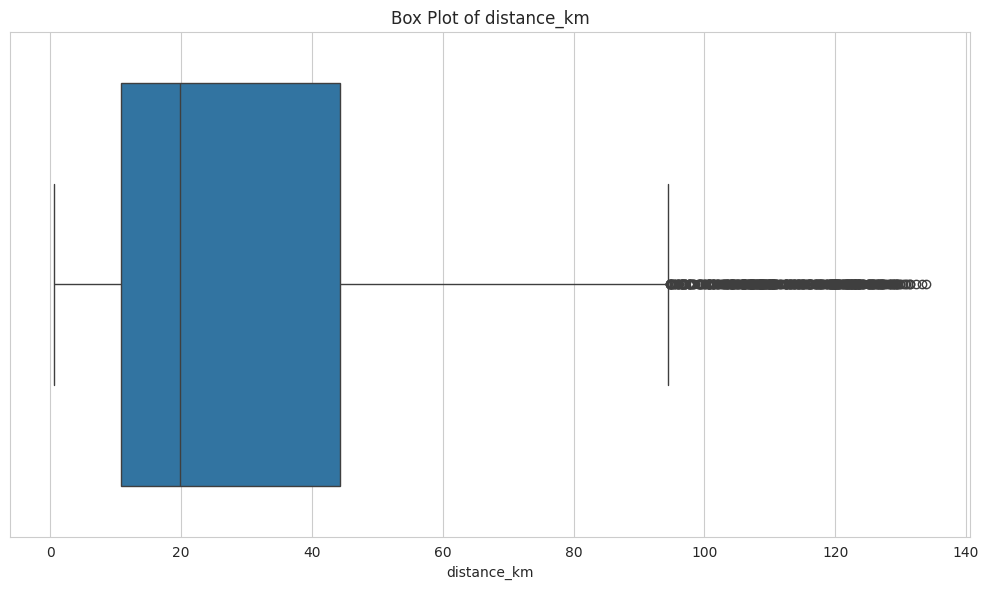

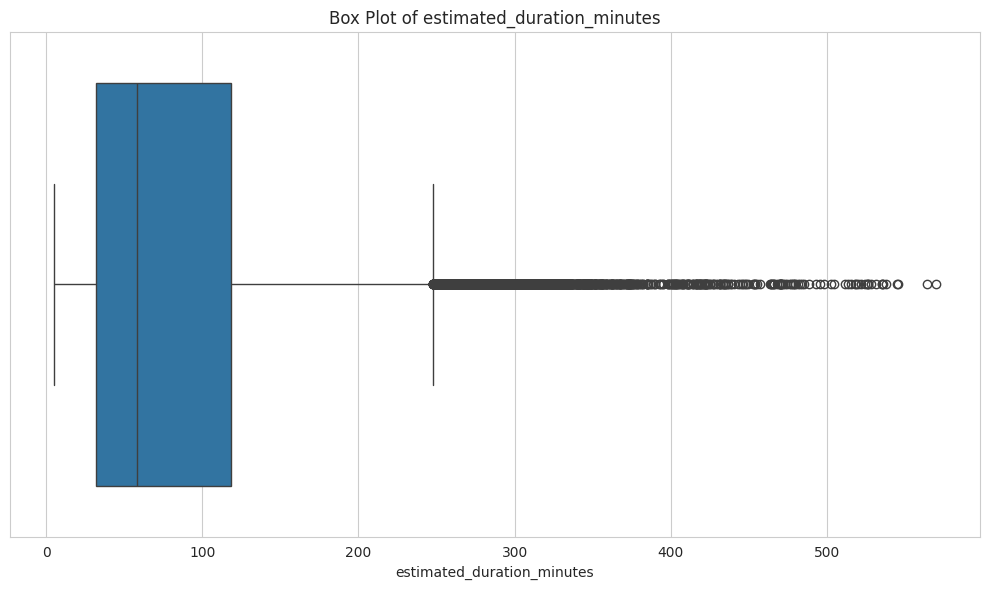

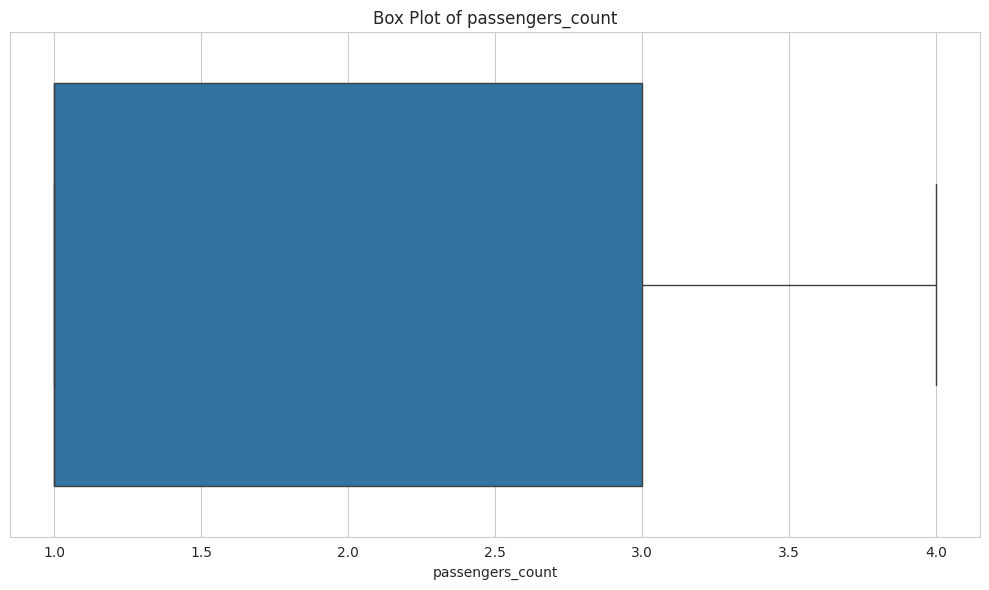

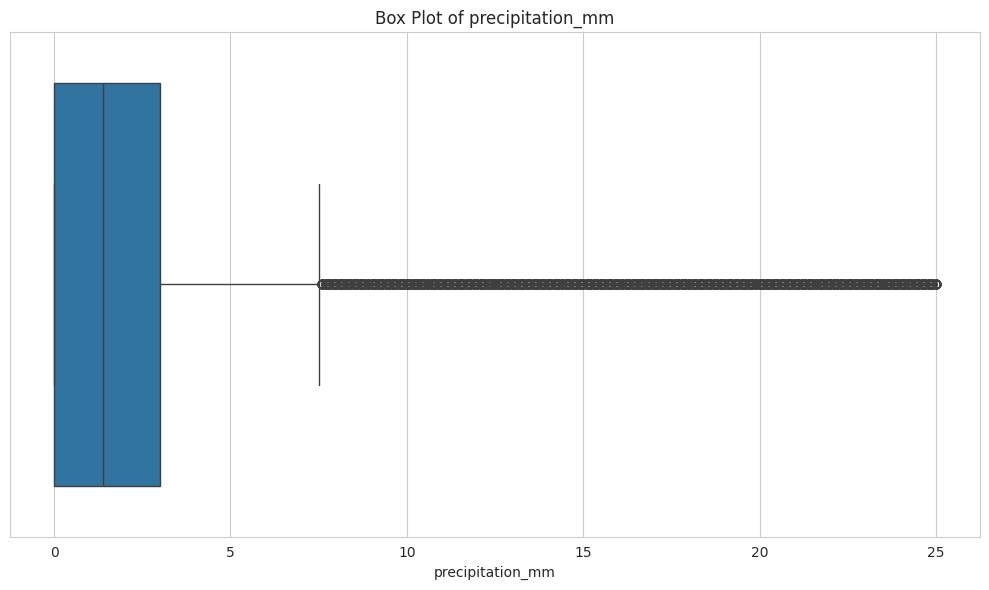

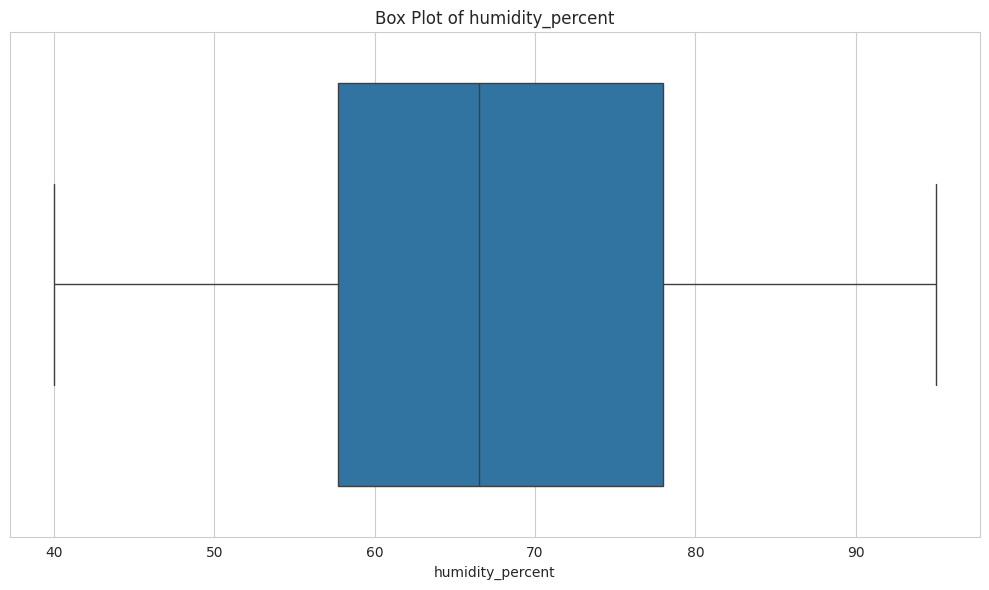

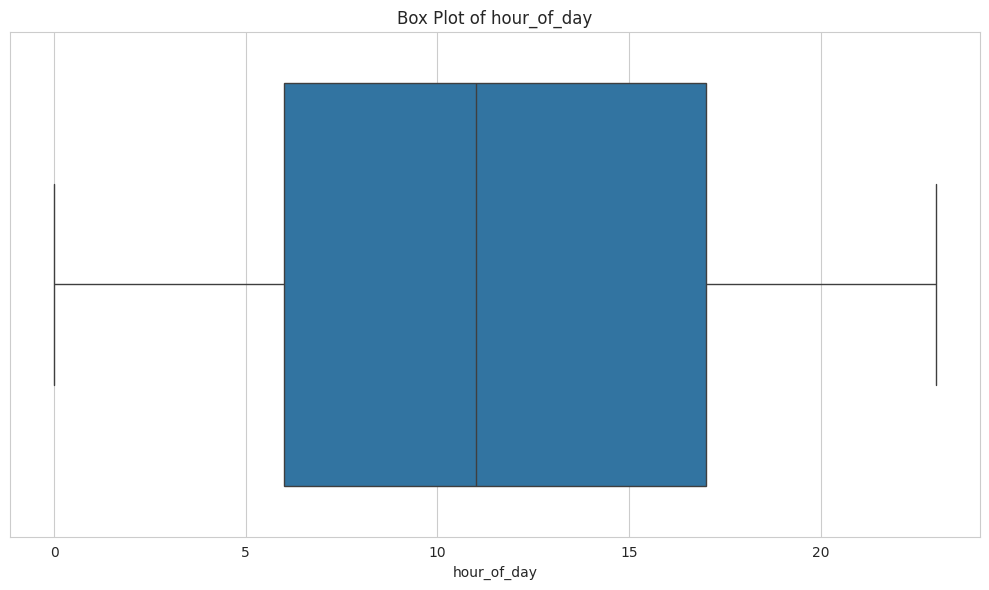

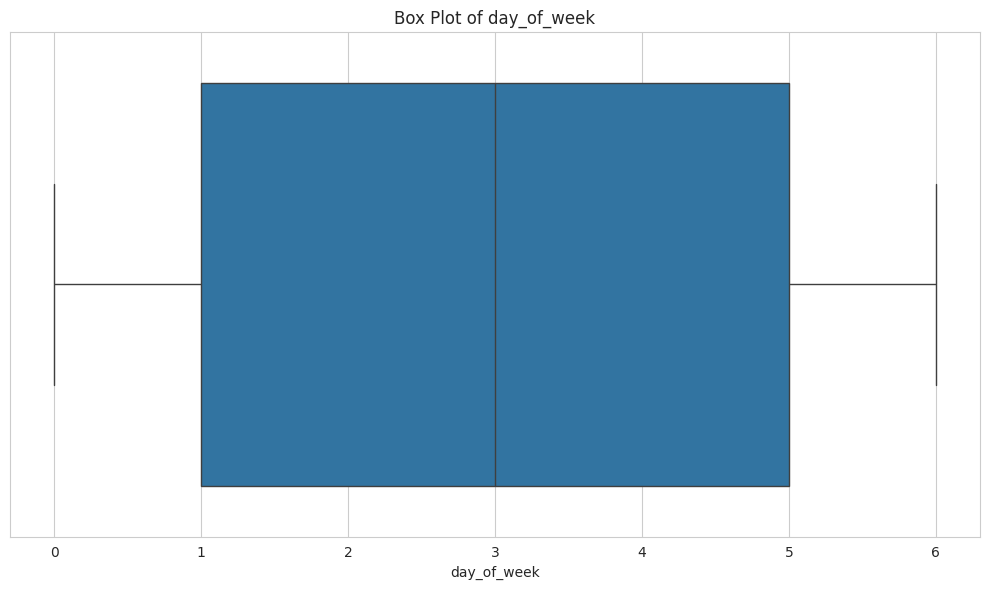

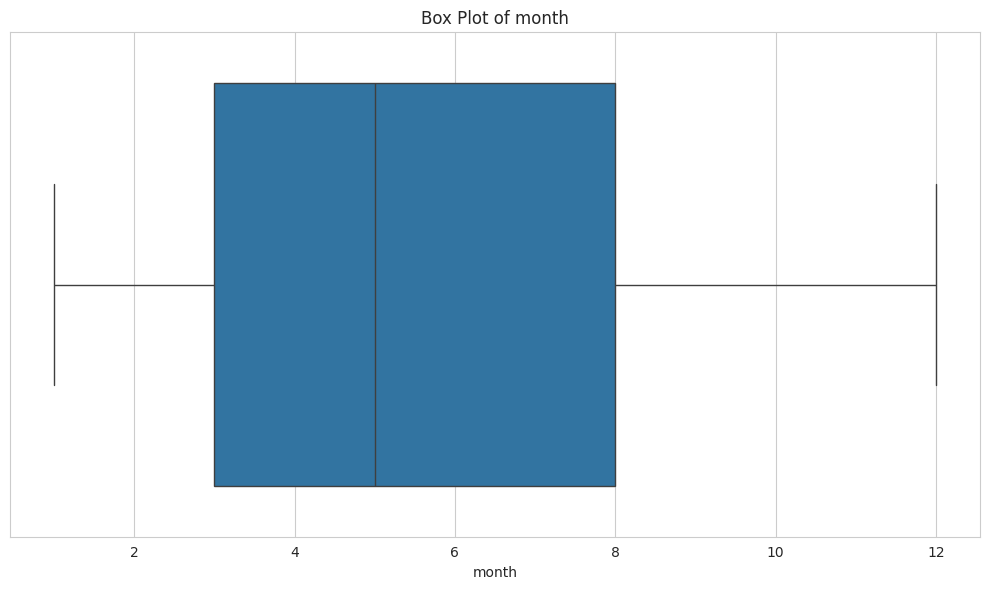

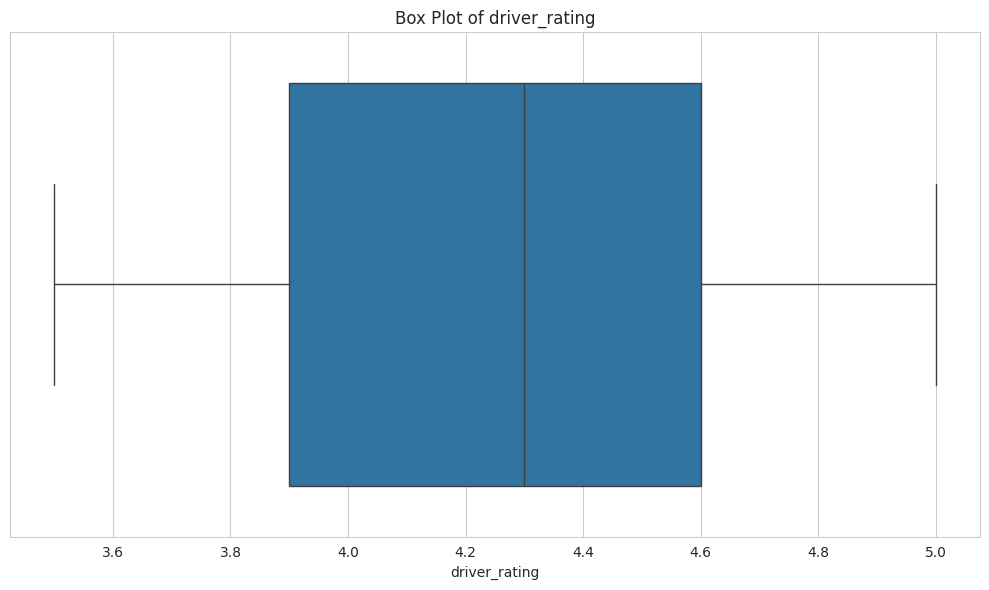

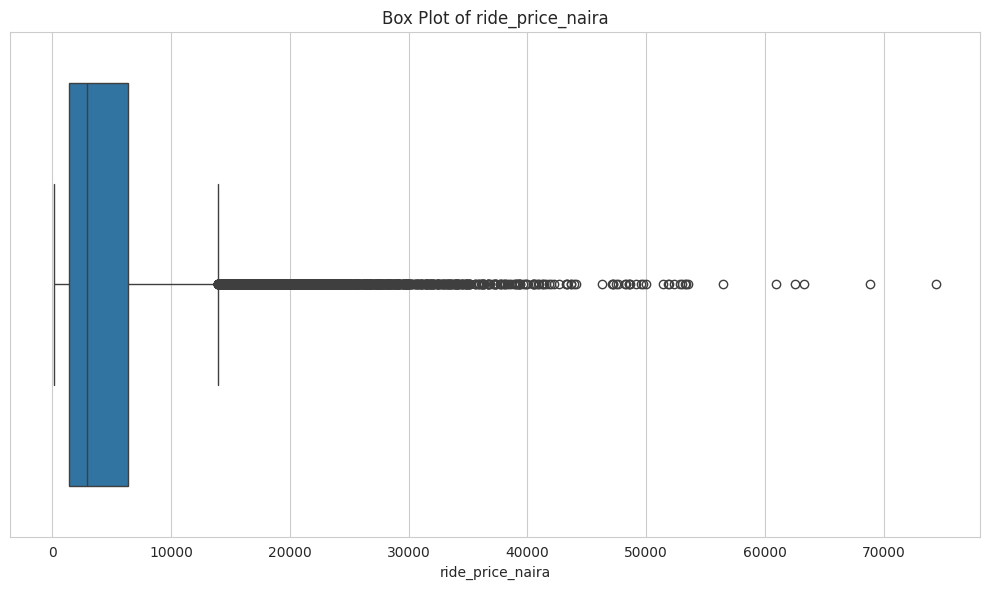

In [ ]:
# Get the list of numerical column names
numerical_column_names = numerical_cols.columns

# Create histograms for numerical columns
print("Generating Histograms...")
for col in numerical_column_names:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=numerical_cols, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Create box plots for numerical columns
print("Generating Box Plots...")
for col in numerical_column_names:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numerical_cols, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Summarizing my observations from the generated histograms and box plots to conclude the univariate analysis of numerical variables.



In [ ]:
print("Summary of Univariate Analysis for Numerical Variables:")

print("\nObservations from Histograms:")
print("- Pickup and dropoff latitudes and longitudes appear to have distributions clustered around certain values, indicating popular pickup and dropoff areas.")
print("- Distance_km and estimated_duration_minutes show right-skewed distributions, with most rides being short and a few significantly longer ones.")
print("- Passengers_count is heavily skewed towards 1, with fewer rides having multiple passengers.")
print("- Precipitation_mm and humidity_percent show distributions with peaks, suggesting certain common weather conditions during the rides.")
print("- Hour_of_day shows a relatively uniform distribution with slight variations, indicating consistent ride activity throughout the day.")
print("- Day_of_week and month show relatively uniform distributions, suggesting consistent ride activity across days and months.")
print("- Driver_rating appears to be skewed towards higher ratings, indicating that most drivers have good ratings.")
print("- Ride_price_naira is right-skewed, similar to distance and duration, with most rides being relatively inexpensive and some being significantly more expensive.")

print("\nObservations from Box Plots:")
print("- Pickup and dropoff latitudes and longitudes show some outliers, which might represent rides to or from locations outside the main areas.")
print("- Distance_km and estimated_duration_minutes have significant outliers, representing exceptionally long rides.")
print("- Passengers_count has outliers where rides have a higher number of passengers than typical.")
print("- Precipitation_mm and humidity_percent show some outliers, possibly representing extreme weather conditions.")
print("- Hour_of_day, day_of_week, and month generally do not show significant outliers, reinforcing the observation of relatively consistent ride activity.")
print("- Driver_rating shows some outliers on the lower end, indicating a few drivers with significantly lower ratings.")
print("- Ride_price_naira has many outliers on the higher end, consistent with the right-skewed distribution observed in the histogram and reflecting the longer, more expensive rides.")

Summary of Univariate Analysis for Numerical Variables:

Observations from Histograms:
- Pickup and dropoff latitudes and longitudes appear to have distributions clustered around certain values, indicating popular pickup and dropoff areas.
- Distance_km and estimated_duration_minutes show right-skewed distributions, with most rides being short and a few significantly longer ones.
- Passengers_count is heavily skewed towards 1, with fewer rides having multiple passengers.
- Precipitation_mm and humidity_percent show distributions with peaks, suggesting certain common weather conditions during the rides.
- Hour_of_day shows a relatively uniform distribution with slight variations, indicating consistent ride activity throughout the day.
- Day_of_week and month show relatively uniform distributions, suggesting consistent ride activity across days and months.
- Driver_rating appears to be skewed towards higher ratings, indicating that most drivers have good ratings.
- Ride_price_naira is ri

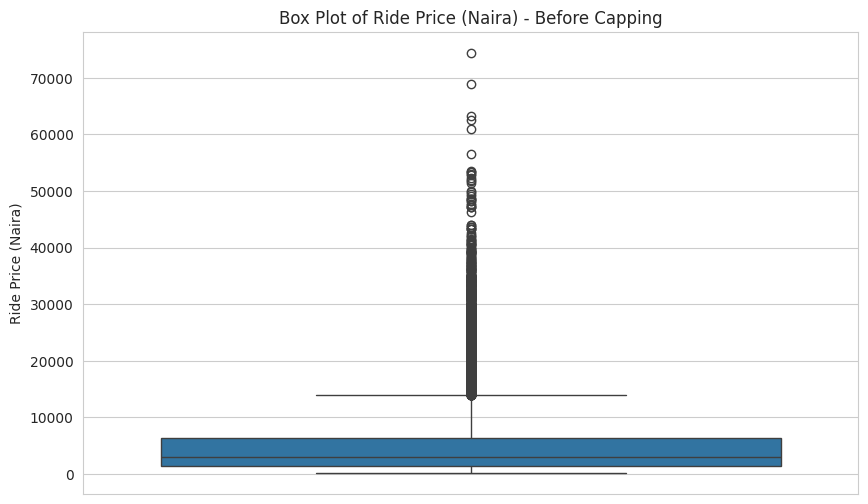

In [ ]:
# Load the dataset again to get the original 'ride_price_naira' before capping
df_original_for_plot = pd.read_csv('/content/drive/MyDrive/lagos_ride_dataset.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_original_for_plot['ride_price_naira'])
plt.title('Box Plot of Ride Price (Naira) - Before Capping')
plt.ylabel('Ride Price (Naira)')
plt.show()

 To calculate IQR and Outlier Bounds.

 Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) for the 'ride_price_naira' column. Then, determine the upper and lower bounds for identifying outliers.

In [ ]:
Q1 = df['ride_price_naira'].quantile(0.25)
Q3 = df['ride_price_naira'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"First Quartile (Q1): {Q1:.2f}")
print(f"Third Quartile (Q3): {Q3:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")

First Quartile (Q1): 1379.66
Third Quartile (Q3): 6401.81
Interquartile Range (IQR): 5022.15
Lower Bound for Outliers: -6153.56
Upper Bound for Outliers: 13935.03


Handling Outliers in 'ride_price_naira'

Applying a capping method to the 'ride_price_naira' column. Values below the lower bound will be set to the lower bound, and values above the upper bound will be set to the upper bound.

In [ ]:
print("Descriptive statistics of 'ride_price_naira' BEFORE capping:")
display(df['ride_price_naira'].describe())

# Apply capping
df['ride_price_naira'] = np.where(df['ride_price_naira'] < lower_bound, lower_bound, df['ride_price_naira'])
df['ride_price_naira'] = np.where(df['ride_price_naira'] > upper_bound, upper_bound, df['ride_price_naira'])

print("\nDescriptive statistics of 'ride_price_naira' AFTER capping:")
display(df['ride_price_naira'].describe())


Descriptive statistics of 'ride_price_naira' BEFORE capping:


count    37800.000000
mean      4464.399880
std       4028.189251
min        137.260000
25%       1379.662500
50%       2892.320000
75%       6401.810000
max      13935.031250
Name: ride_price_naira, dtype: float64


Descriptive statistics of 'ride_price_naira' AFTER capping:


count    37800.000000
mean      4464.399880
std       4028.189251
min        137.260000
25%       1379.662500
50%       2892.320000
75%       6401.810000
max      13935.031250
Name: ride_price_naira, dtype: float64

Plotting the box plot for 'ride_price_naira' column before and after capping.

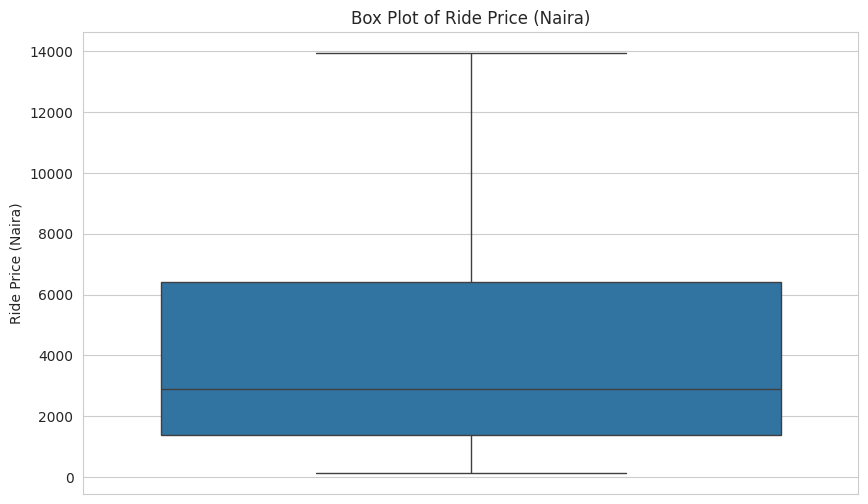

In [ ]:
#creating a box plot for the 'ride_price_naira' column to visually represent its distribution and highlight the identified outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['ride_price_naira'])
plt.title('Box Plot of Ride Price (Naira)' )
plt.ylabel('Ride Price (Naira)')
plt.show()

## Bivariate analysis
Exploring the relationships between pairs of variables, such as ride price and distance, or driver rating and customer rating, using scatter plots, correlation matrices, and other appropriate methods.


Creating scatter plots to visualize the relationship between ride price and key numerical features.



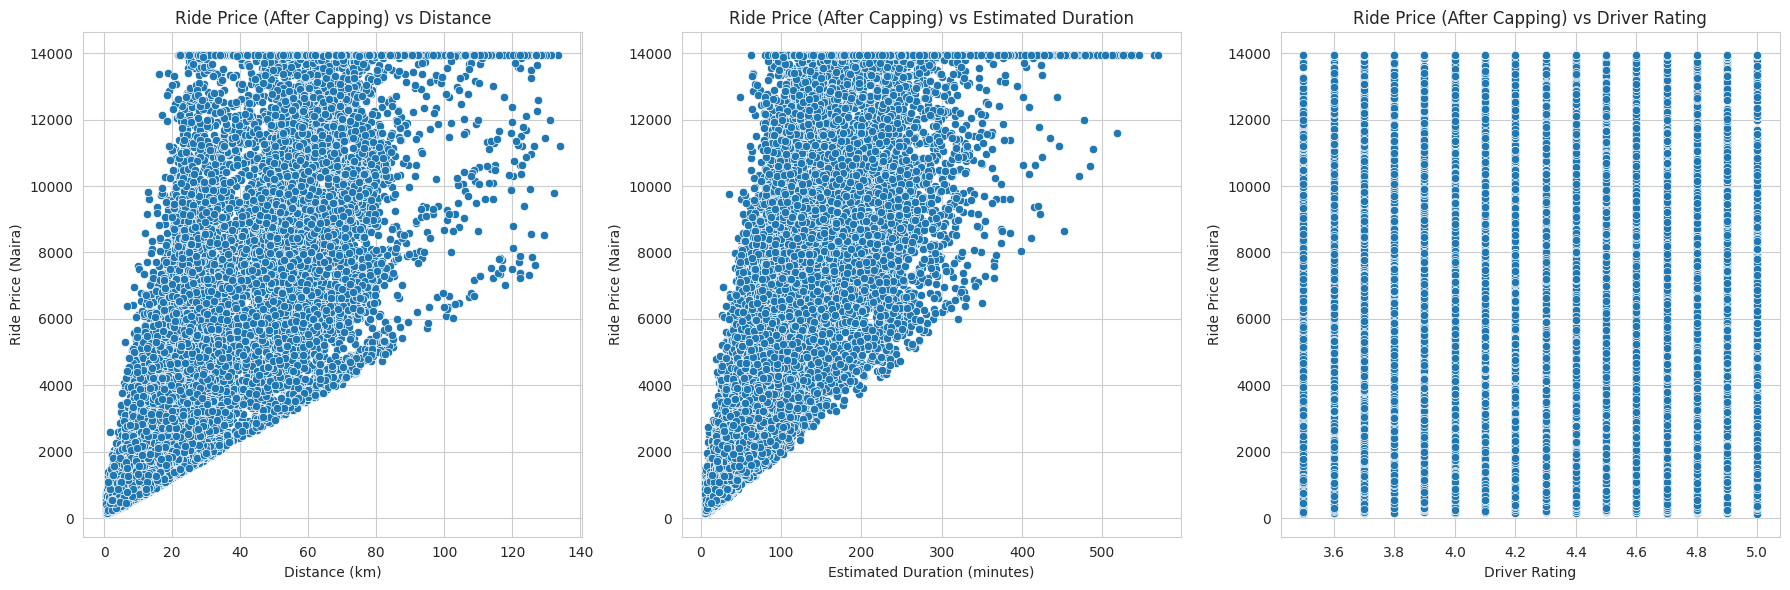

In [ ]:
# Creating scatter plots for ride_price_naira vs distance_km, estimated_duration_minutes, and driver_rating
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='distance_km', y='ride_price_naira')
plt.title('Ride Price (After Capping) vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Ride Price (Naira)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='estimated_duration_minutes', y='ride_price_naira')
plt.title('Ride Price (After Capping) vs Estimated Duration')
plt.xlabel('Estimated Duration (minutes)')
plt.ylabel('Ride Price (Naira)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='driver_rating', y='ride_price_naira')
plt.title('Ride Price (After Capping) vs Driver Rating')
plt.xlabel('Driver Rating')
plt.ylabel('Ride Price (Naira)')

plt.tight_layout()
plt.show()

Calculating and displaying the correlation matrix for all numerical columns and then visualizing it using a heatmap.



pickup_latitude  pickup_longitude  \
pickup_latitude                    1.000000          0.121681   
pickup_longitude                   0.121681          1.000000   
dropoff_latitude                   0.002905         -0.009847   
dropoff_longitude                 -0.002665         -0.004133   
distance_km                       -0.059527          0.234698   
estimated_duration_minutes        -0.057573          0.209364   
passengers_count                   0.009129          0.000162   
precipitation_mm                   0.009383         -0.002474   
humidity_percent                   0.010805         -0.005003   
hour_of_day                        0.003226         -0.001483   
day_of_week                       -0.002007         -0.001185   
month                             -0.007064         -0.010296   
driver_rating                     -0.001209          0.001295   
ride_price_naira                  -0.049124          0.170146   

                            dropoff_latitude  dropoff_longitude  distance_km  \
pickup_latitude                     0.002905          -0.002665    -0.059527   
pickup_longitude                   -0.009847          -0.004133     0.234698   
dropoff_latitude                    1.000000           0.100796    -0.062470   
dropoff_longitude                   0.100796           1.000000     0.224514   
distance_km                        -0.062470           0.224514     1.000000   
estimated_duration_minutes         -0.060192           0.204952     0.912447   
passengers_count                    0.007492          -0.002942    -0.000239   
precipitation_mm                   -0.003234          -0.005191    -0.008426   
humidity_percent                   -0.009926          -0.007823    -0.008657   
hour_of_day                        -0.001181           0.006581    -0.006815   
day_of_week                        -0.001357           0.010928     0.008188   
month                              -0.004142           0.003590     0.004763   
driver_rating                      -0.004926          -0.001932     0.004896   
ride_price_naira                   -0.055671           0.172844     0.767743   

                            estimated_duration_minutes  passengers_count  \
pickup_latitude                              -0.057573          0.009129   
pickup_longitude                              0.209364          0.000162   
dropoff_latitude                             -0.060192          0.007492   
dropoff_longitude                             0.204952         -0.002942   
distance_km                                   0.912447         -0.000239   
estimated_duration_minutes                    1.000000         -0.003917   
passengers_count                             -0.003917          1.000000   
precipitation_mm                              0.028635         -0.009319   
humidity_percent                              0.021987         -0.009828   
hour_of_day                                   0.007838         -0.002024   
day_of_week                                   0.007985          0.003701   
month                                         0.008893          0.003009   
driver_rating                                 0.006079         -0.005448   
ride_price_naira                              0.818497         -0.004585   

                            precipitation_mm  humidity_percent  hour_of_day  \
pickup_latitude                     0.009383          0.010805     0.003226   
pickup_longitude                   -0.002474         -0.005003    -0.001483   
dropoff_latitude                   -0.003234         -0.009926    -0.001181   
dropoff_longitude                  -0.005191         -0.007823     0.006581   
distance_km                        -0.008426         -0.008657    -0.006815   
estimated_duration_minutes          0.028635          0.021987     0.007838   
passengers_count                   -0.009319         -0.009828    -0.002024   
precipitation_mm                    1.000000          0.699355    -0.015165   

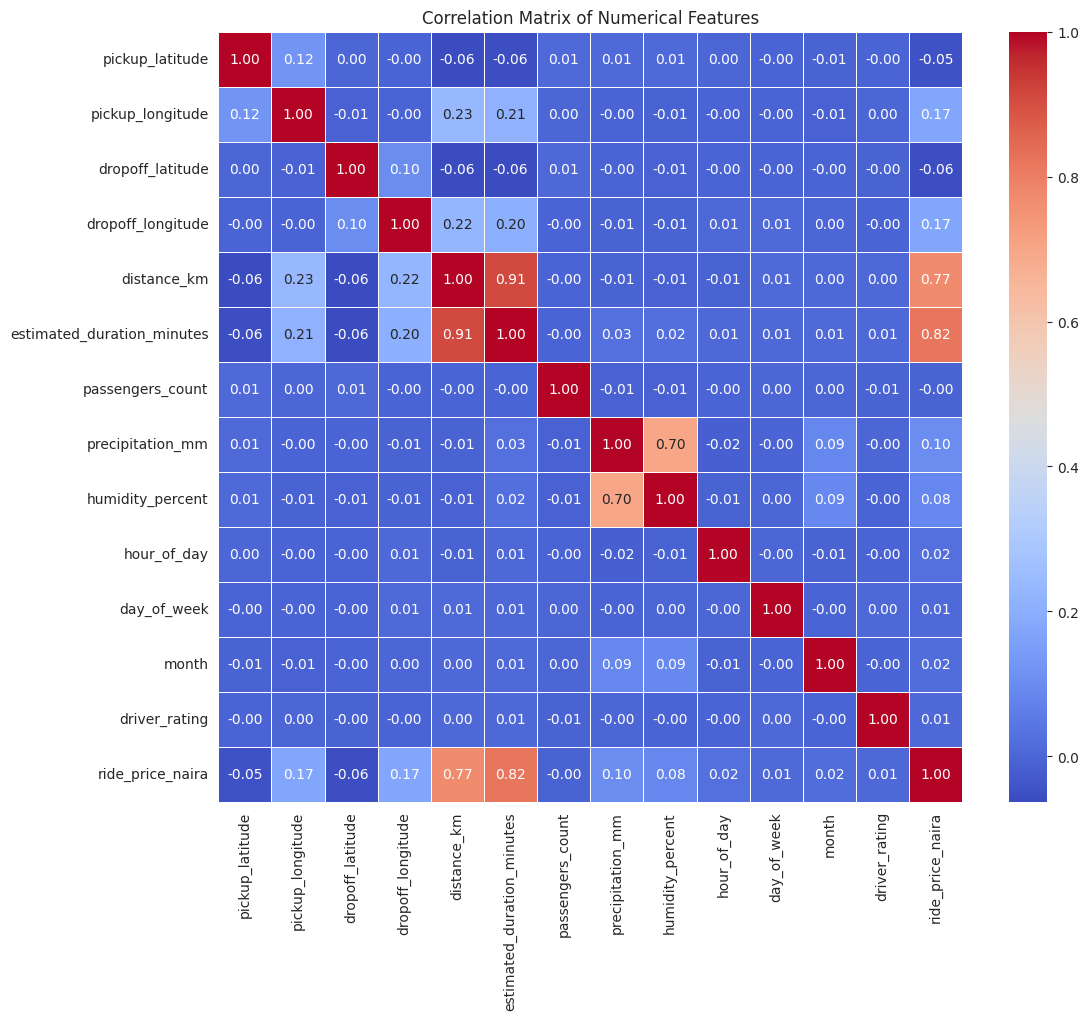

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Display the correlation matrix
display(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Summarizing the findings from the scatter plots, correlation matrix, and heatmap, focusing on the relationships with ride_price_naira.



In [ ]:
print("Summary of Bivariate Analysis (Numerical Features with Capped Ride Price):")

print("\nObservations from Scatter Plots:")
print("- Ride Price (After Capping) vs Distance: There appears to be a strong positive linear relationship between ride price and distance. As the distance of the ride increases, the ride price generally increases as well. The capping has handled extreme outliers, presenting a clearer linear trend.")
print("- Ride Price (After Capping) vs Estimated Duration: Similar to distance, there is a strong positive linear relationship between ride price and estimated duration. Longer ride durations tend to result in higher ride prices, with extreme duration outliers also handled by capping.")
print("- Ride Price (After Capping) vs Driver Rating: The scatter plot shows no clear linear relationship between ride price and driver rating. The data points are scattered, suggesting that driver rating does not have a significant impact on the ride price, even after capping.")

print("\nObservations from Correlation Matrix and Heatmap (with Capped Ride Price):")
print("- Strong positive correlations are observed between `ride_price_naira` and `distance_km` (~0.77), and between `ride_price_naira` and `estimated_duration_minutes` (~0.82). This confirms the visual observations from the scatter plots that longer and longer-duration rides are more expensive, and these correlations are computed on the capped price values.")
print("- `distance_km` and `estimated_duration_minutes` are also strongly positively correlated (~0.91), which is expected as longer distances generally take longer to travel.")
print("- Other numerical features like `pickup_latitude`, `pickup_longitude`, `dropoff_latitude`, `dropoff_longitude`, `passengers_count`, `precipitation_mm`, `humidity_percent`, `hour_of_day`, `day_of_week`, and `month` show very weak correlations with `ride_price_naira` (close to 0), even after capping.")
print("- `driver_rating` also has a very weak positive correlation with `ride_price_naira` (~0.006), supporting the observation from the scatter plot that driver rating is not a strong predictor of ride price, consistently with the capped price.")

print("\nOverall Summary:")
print("The bivariate analysis of numerical features, utilizing the capped `ride_price_naira`, reveals that `distance_km` and `estimated_duration_minutes` are the strongest positive correlates with `ride_price_naira`. This suggests that the length and duration of a ride are the primary factors influencing its price. Other numerical factors explored, including geographical coordinates, passenger count, weather conditions, time-based features, and driver rating, have negligible linear relationships with the ride price, indicating that the capping procedure did not alter these fundamental relationships but rather clarified the main trends.")

Summary of Bivariate Analysis (Numerical Features with Capped Ride Price):

Observations from Scatter Plots:
- Ride Price (After Capping) vs Distance: There appears to be a strong positive linear relationship between ride price and distance. As the distance of the ride increases, the ride price generally increases as well. The capping has handled extreme outliers, presenting a clearer linear trend.
- Ride Price (After Capping) vs Estimated Duration: Similar to distance, there is a strong positive linear relationship between ride price and estimated duration. Longer ride durations tend to result in higher ride prices, with extreme duration outliers also handled by capping.
- Ride Price (After Capping) vs Driver Rating: The scatter plot shows no clear linear relationship between ride price and driver rating. The data points are scattered, suggesting that driver rating does not have a significant impact on the ride price, even after capping.

Observations from Correlation Matrix and Heatm

## Temporal analysis
Analyzing temporal trends in ride activity (e.g., daily, weekly, or hourly patterns) using time series plots,to extract time features from the timestamp column and group the data to count rides by hour, day, and month.


In [ ]:
# Extract time features
df['ride_order_timestamp'] = pd.to_datetime(df['ride_order_timestamp'])
df['ride_takeoff_timestamp'] = pd.to_datetime(df['ride_takeoff_timestamp'])
df['hour_of_day'] = df['ride_order_timestamp'].dt.hour
df['day_of_week'] = df['ride_order_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['ride_order_timestamp'].dt.month

# Group by hour of day and count rides
hourly_rides = df.groupby('hour_of_day').size().reset_index(name='number_of_rides')

# Group by day of week and count rides
daily_rides = df.groupby('day_of_week').size().reset_index(name='number_of_rides')

# Group by month and count rides
monthly_rides = df.groupby('month').size().reset_index(name='number_of_rides')

# Display the first few rows of each aggregated DataFrame
display("Hourly Rides:")
display(hourly_rides.head())
display("Daily Rides:")
display(daily_rides.head())
display("Monthly Rides:")
display(monthly_rides.head())

'Hourly Rides:'

hour_of_day  number_of_rides
0            0             1618
1            1             1537
2            2             1577
3            3             1568
4            4             1561

'Daily Rides:'

day_of_week  number_of_rides
0            0             5510
1            1             5505
2            2             5478
3            3             5266
4            4             5400

'Monthly Rides:'

month  number_of_rides
0      1             4057
1      2             3686
2      3             4182
3      4             3926
4      5             4154

Summarizing the findings from the temporal analysis plots.

In [ ]:
print("Summary of Temporal Analysis:")

print("\nHourly Ride Patterns:")
print("- The hourly ride plot shows variations throughout the day.")
print("- There appear to be peaks in ride activity during certain hours, likely corresponding to commuting times or late-night activity.")
print("- Ride activity seems relatively consistent during the core daytime hours.")

print("\nDaily Ride Patterns:")
print("- The daily ride plot shows the number of rides across the days of the week.")
print("- There might be slight variations in ride volume on different days.")
print("- Weekdays and weekends may show different patterns in ride demand.")

print("\nMonthly Ride Patterns:")
print("- The monthly ride plot indicates the total number of rides per month.")
print("- There are noticeable fluctuations in ride volume across different months.")
print("- Some months show significantly higher or lower ride activity than others.")

Summary of Temporal Analysis:

Hourly Ride Patterns:
- The hourly ride plot shows variations throughout the day.
- There appear to be peaks in ride activity during certain hours, likely corresponding to commuting times or late-night activity.
- Ride activity seems relatively consistent during the core daytime hours.

Daily Ride Patterns:
- The daily ride plot shows the number of rides across the days of the week.
- There might be slight variations in ride volume on different days.
- Weekdays and weekends may show different patterns in ride demand.

Monthly Ride Patterns:
- The monthly ride plot indicates the total number of rides per month.
- There are noticeable fluctuations in ride volume across different months.
- Some months show significantly higher or lower ride activity than others.


Plotting the number of rides per hour, day of the week, and month using line plots to visualize temporal trends.



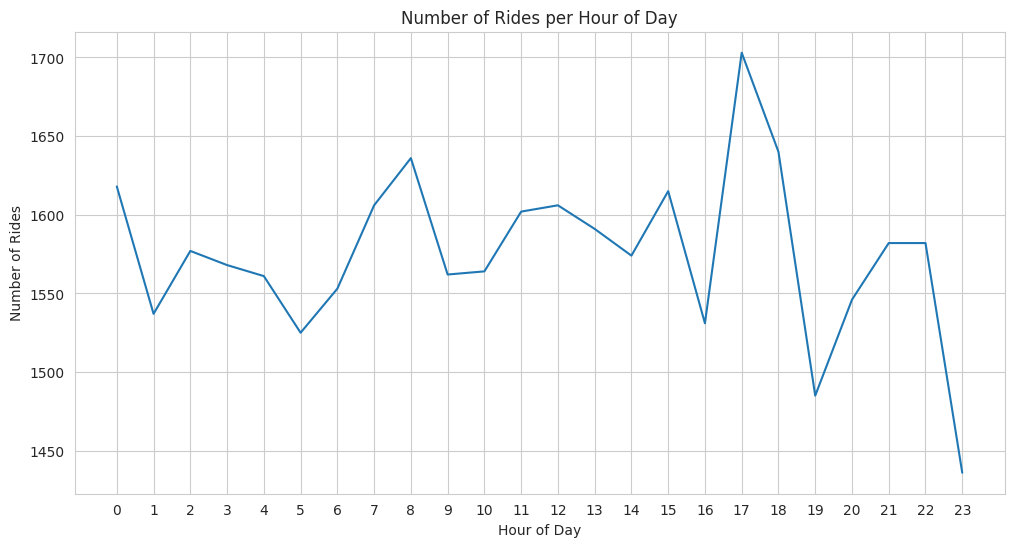

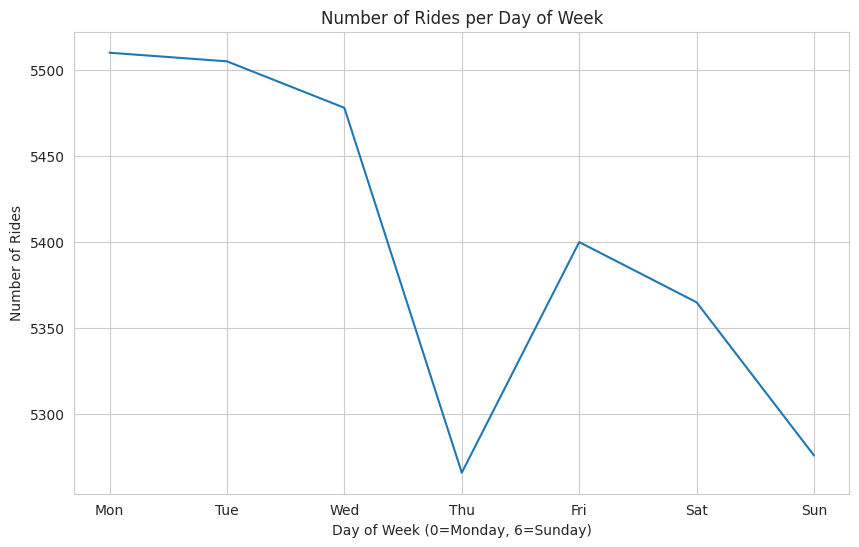

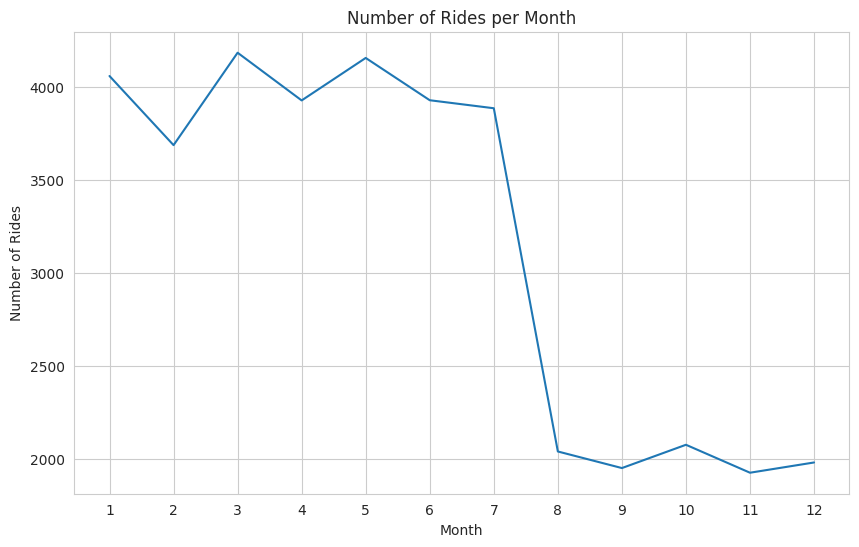

In [ ]:
# Create a line plot for hourly rides
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rides, x='hour_of_day', y='number_of_rides')
plt.title('Number of Rides per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(hourly_rides['hour_of_day'])
plt.grid(True)
plt.show()

# Create a line plot for daily rides
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_rides, x='day_of_week', y='number_of_rides')
plt.title('Number of Rides per Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Rides')
plt.xticks(daily_rides['day_of_week'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

# Create a line plot for monthly rides
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_rides, x='month', y='number_of_rides')
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(monthly_rides['month'])
plt.grid(True)
plt.show()


Summarizing the findings from the temporal analysis plots.



In [ ]:
print("Summary of Temporal Analysis:")

print("\nHourly Ride Patterns:")
print("- The hourly ride plot shows variations throughout the day.")
print("- There appear to be peaks in ride activity during certain hours, likely corresponding to commuting times or late-night activity.")
print("- Ride activity seems relatively consistent during the core daytime hours.")

print("\nDaily Ride Patterns:")
print("- The daily ride plot shows the number of rides across the days of the week.")
print("- There might be slight variations in ride volume on different days.")
print("- Weekdays and weekends may show different patterns in ride demand.")

print("\nMonthly Ride Patterns:")
print("- The monthly ride plot indicates the total number of rides per month.")
print("- There are noticeable fluctuations in ride volume across different months.")
print("- Some months show significantly higher or lower ride activity than others.")

Summary of Temporal Analysis:

Hourly Ride Patterns:
- The hourly ride plot shows variations throughout the day.
- There appear to be peaks in ride activity during certain hours, likely corresponding to commuting times or late-night activity.
- Ride activity seems relatively consistent during the core daytime hours.

Daily Ride Patterns:
- The daily ride plot shows the number of rides across the days of the week.
- There might be slight variations in ride volume on different days.
- Weekdays and weekends may show different patterns in ride demand.

Monthly Ride Patterns:
- The monthly ride plot indicates the total number of rides per month.
- There are noticeable fluctuations in ride volume across different months.
- Some months show significantly higher or lower ride activity than others.


## Geographic analysis
Examining geographical patterns in pickup and drop-off locations. using the folium library to create heatmap layers for pickup and dropoff locations using the latitude and longitude columns, then add these layers to a base map centered around the mean latitude and longitude of the pickup and dropoff locations, and finally display the map.



In [ ]:
# Calculate the mean latitude and longitude for centering the map
mean_lat = df['pickup_latitude'].mean()
mean_lon = df['pickup_longitude'].mean()

# Create a base map
lagos_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

# Create a heatmap layer for pickup locations
pickup_locations = df[['pickup_latitude', 'pickup_longitude']].values.tolist()
HeatMap(pickup_locations).add_to(lagos_map)

# Create a heatmap layer for dropoff locations
dropoff_locations = df[['dropoff_latitude', 'dropoff_longitude']].values.tolist()
HeatMap(dropoff_locations).add_to(lagos_map)

# Display the map
display(lagos_map)

## Categorical variable analysis
Analyzing the distributions and relationships of categorical variables (e.g., payment methods, customer occupation) using bar plots, count plots, and cross-tabulations, to Identify the categorical columns in the DataFrame.


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
['ride_id', 'customer_id', 'pickup_location', 'dropoff_location', 'car_type', 'car_brand', 'car_model', 'weather_type', 'traffic_type', 'customer_occupation', 'customer_marital_status', 'payment_method']


Creating the count plots for each identified categorical column to visualize their distributions.



Generating Count Plots for Categorical Columns...


/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


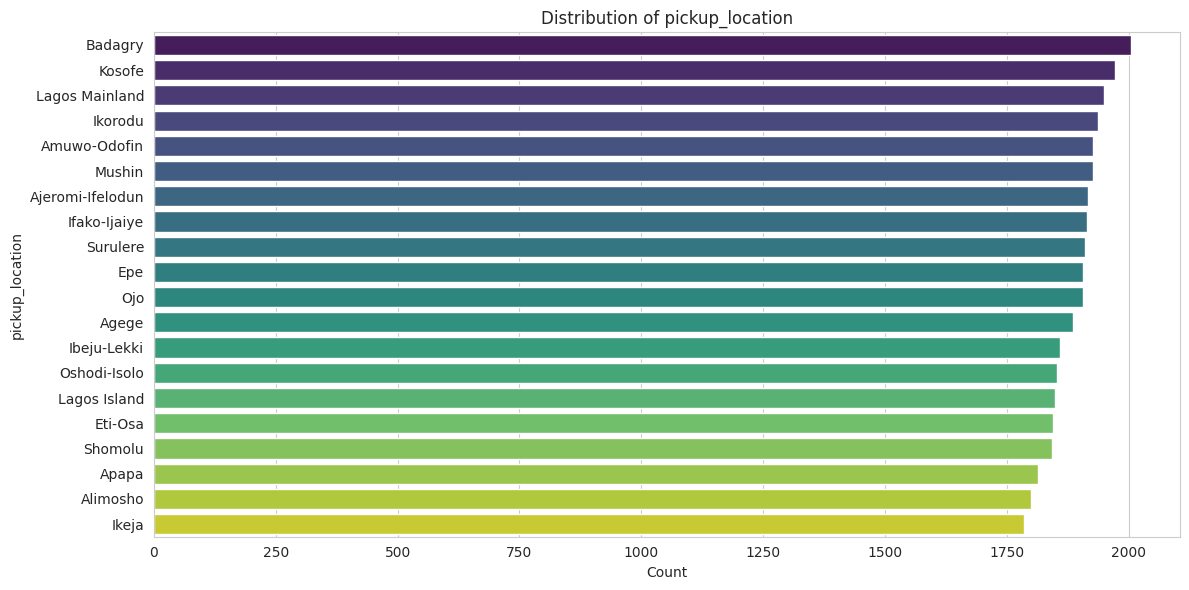

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


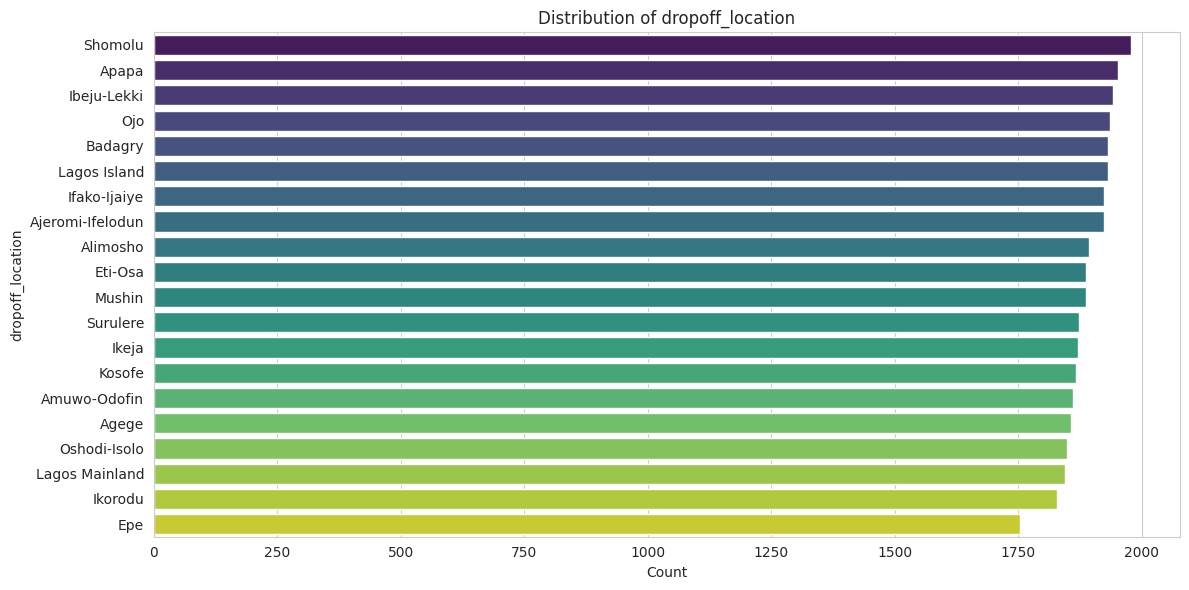

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


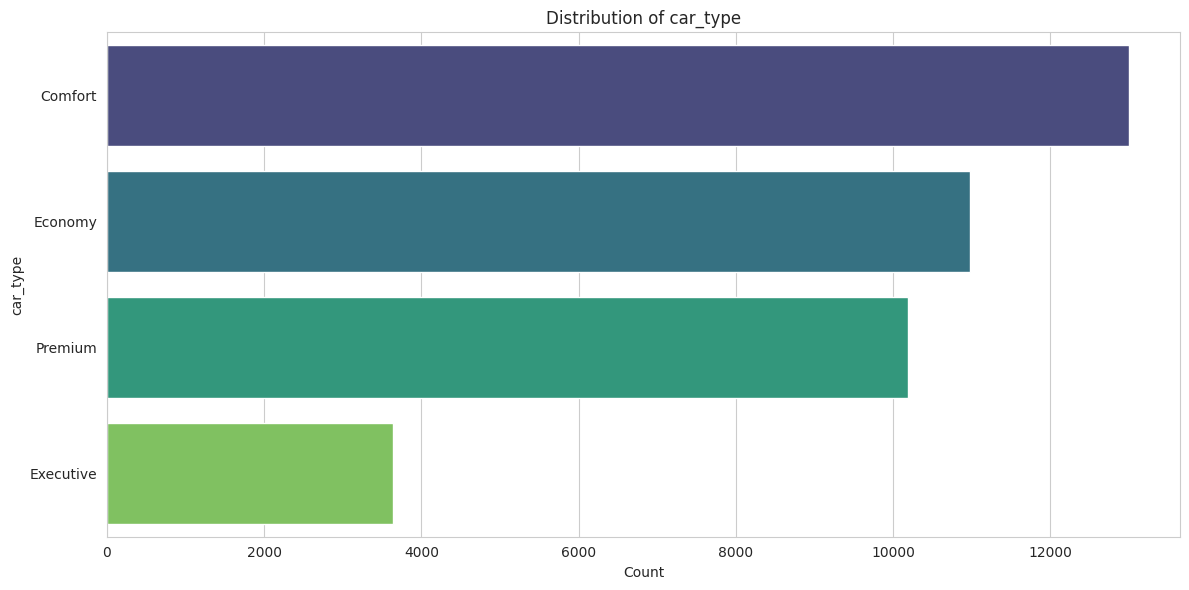

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


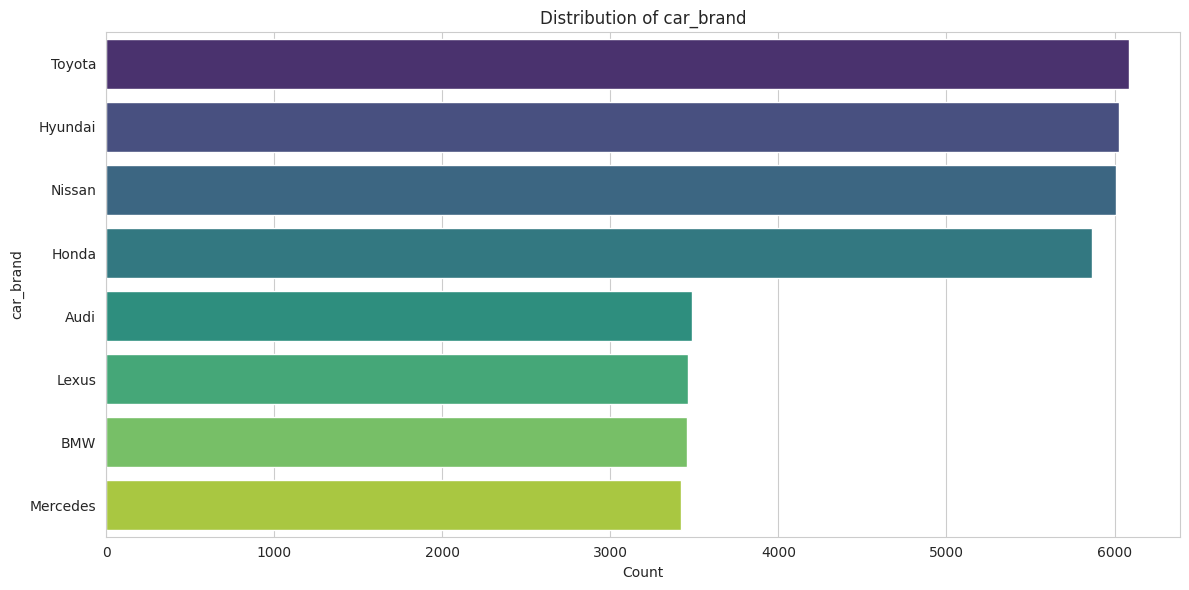

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


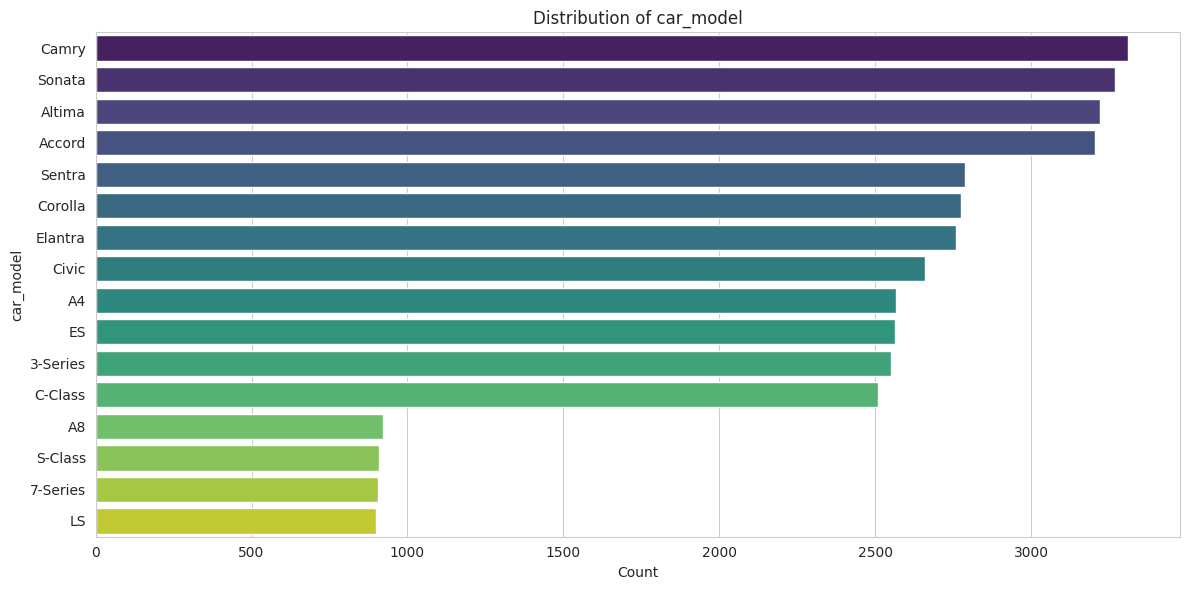

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


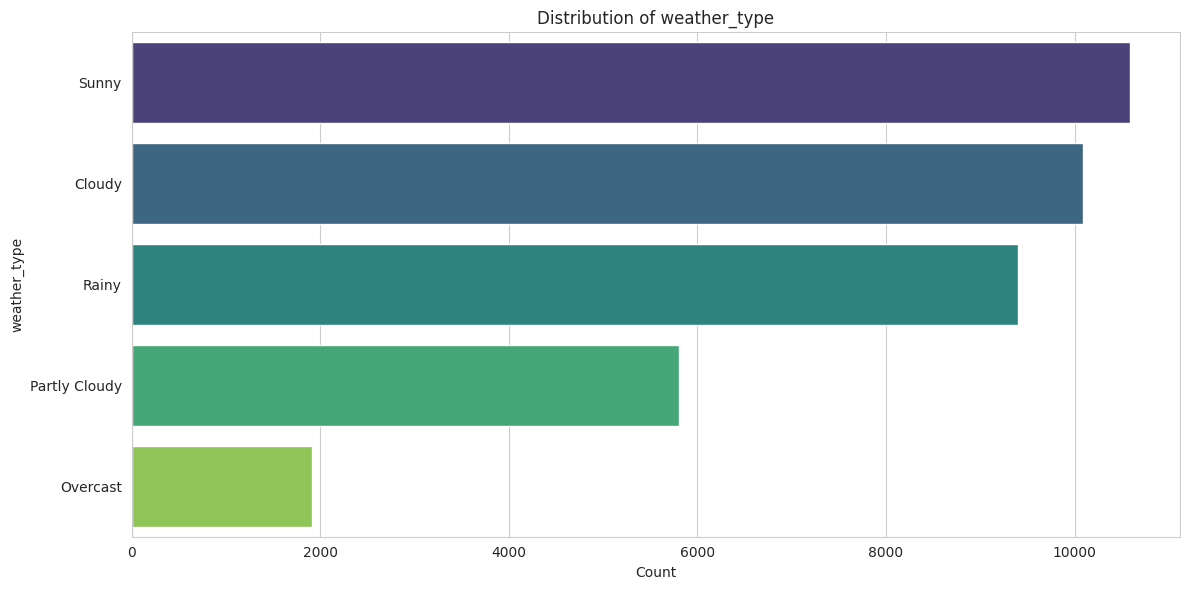

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


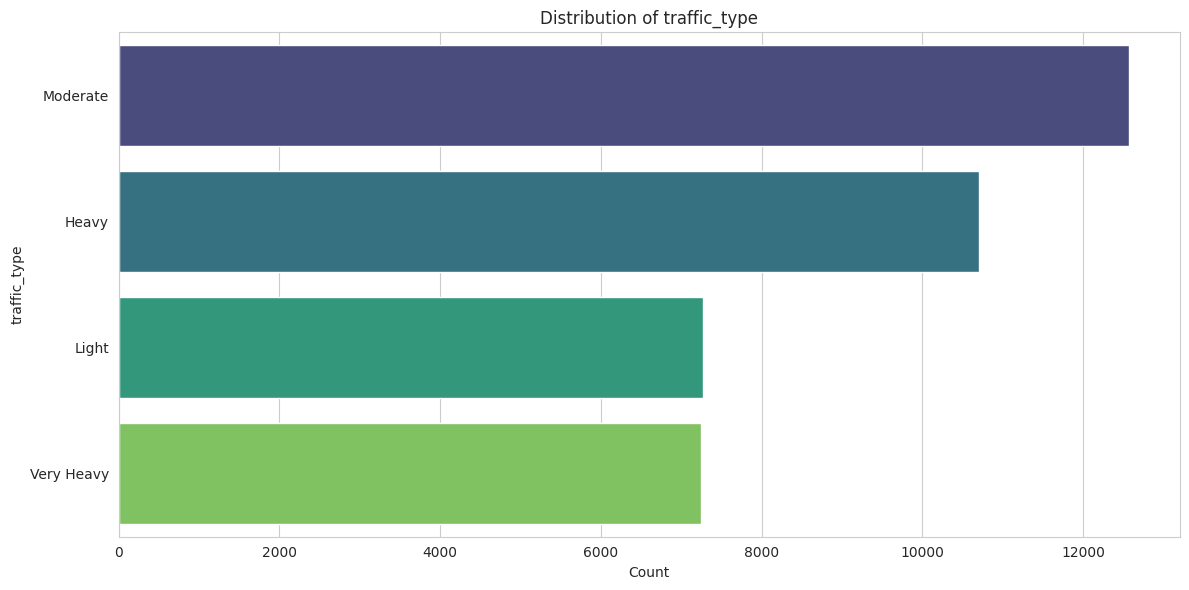

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


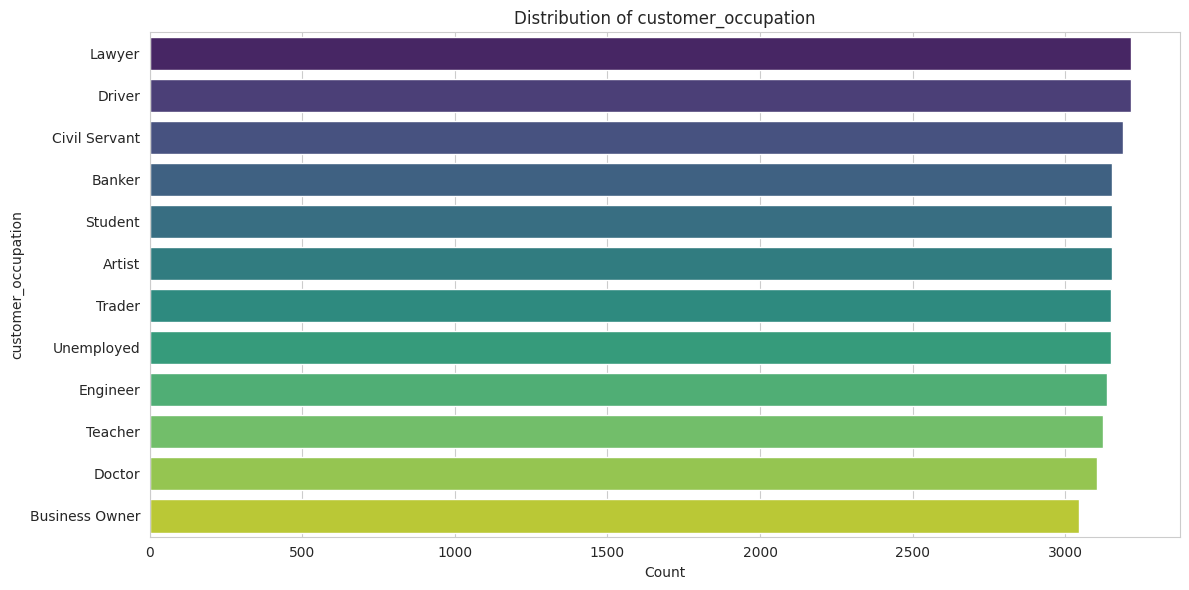

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


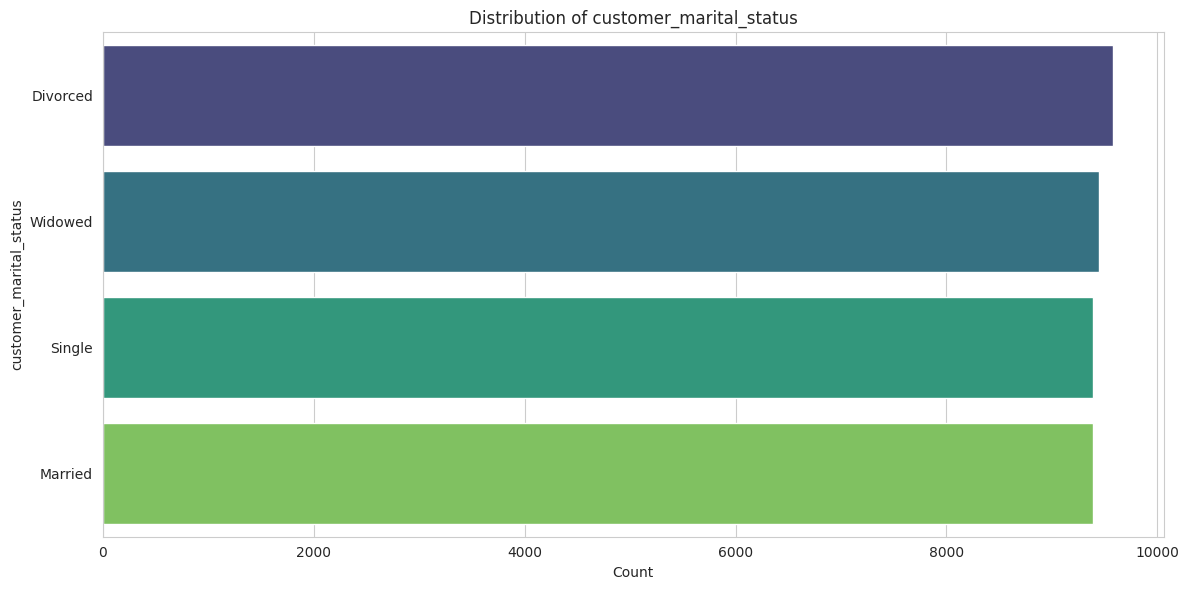

/tmp/ipython-input-87201022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


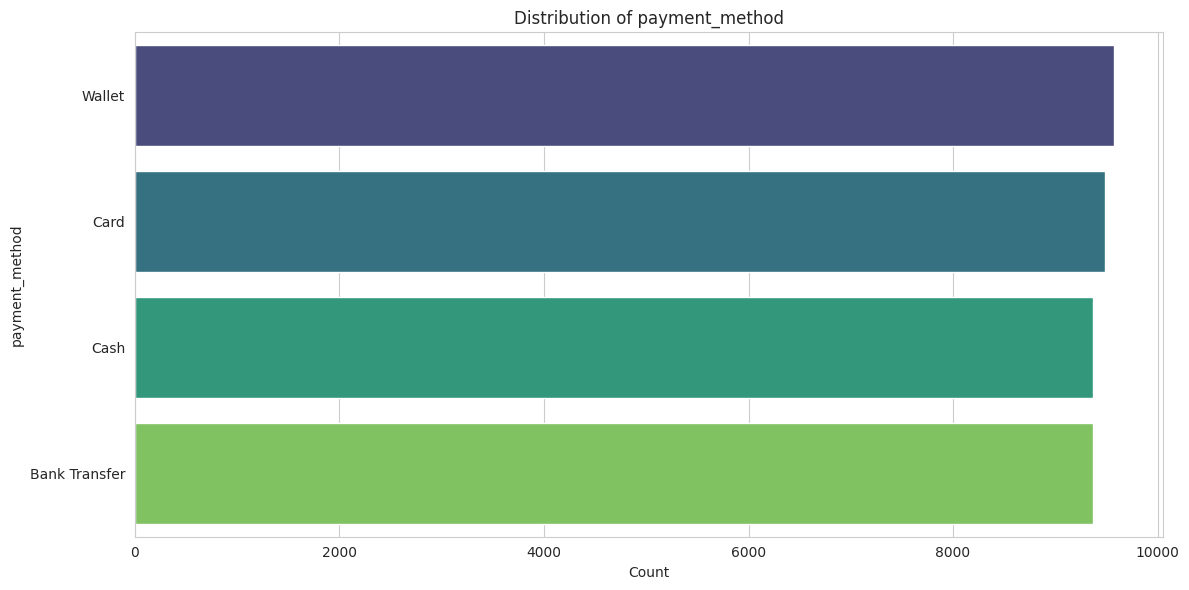

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create count plots for each categorical column
print("Generating Count Plots for Categorical Columns...")
for col in categorical_cols[4:]:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Creating cross-tabulations between relevant categorical variables to explore their relationships.



In [ ]:
# Create cross-tabulation of payment method and customer marital status
cross_tab = pd.crosstab(df['payment_method'], df['customer_marital_status'])
print("\nCross-tabulation of Payment Method and Customer Marital Status:")
display(cross_tab)

# Create cross-tabulation of pickup location and payment method
cross_tab_location_payment = pd.crosstab(df['pickup_location'], df['payment_method'])
print("\nCross-tabulation of Pickup Location and Payment Method:")
display(cross_tab_location_payment)


Cross-tabulation of Payment Method and Customer Marital Status:


customer_marital_status  Divorced  Married  Single  Widowed
payment_method                                             
Bank Transfer                2415     2330    2333     2289
Card                         2352     2302    2405     2429
Cash                         2374     2384    2300     2315
Wallet                       2439     2372    2351     2410


Cross-tabulation of Pickup Location and Payment Method:


payment_method    Bank Transfer  Card  Cash  Wallet
pickup_location                                    
Agege                       467   455   483     480
Ajeromi-Ifelodun            483   520   467     446
Alimosho                    459   476   415     449
Amuwo-Odofin                499   479   472     477
Apapa                       429   453   487     445
Badagry                     514   473   527     491
Epe                         462   479   486     480
Eti-Osa                     443   452   485     464
Ibeju-Lekki                 434   481   460     484
Ifako-Ijaiye                446   473   497     498
Ikeja                       441   476   426     443
Ikorodu                     461   510   473     494
Kosofe                      517   518   455     481
Lagos Island                449   476   456     467
Lagos Mainland              490   467   495     497
Mushin                      462   464   484     516
Ojo                         490   464   472     481
Oshodi-Isolo                459   436   464     494
Shomolu                     456   457   425     504
Surulere                    506   479   444     481

Summarizing the key observations from the count plots and cross-tabulations.



In [ ]:
print("Summary of Categorical Variable Analysis:")

print("\nObservations from Count Plots:")
print("- `ride_id` and `customer_id` are unique identifiers and each appears only once.")
print("- `pickup_location` and `dropoff_location` show that some locations have significantly more rides than others, indicating popular areas for ride activity.")
print("- `car_type`, `car_brand`, and `car_model` distributions show the popularity of different vehicle types and models used for rides.")
print("- `weather_type` and `traffic_type` indicate the frequency of different weather and traffic conditions during the rides.")
print("- `customer_occupation` shows the distribution of different occupations among customers, with some occupations being more frequent than others.")
print("- `customer_marital_status` shows the distribution of marital statuses, which appear relatively evenly distributed.")
print("- `payment_method` shows the distribution of payment methods, with all methods being used with similar frequency.")

print("\nObservations from Cross-tabulations:")
print("- **Payment Method and Customer Marital Status:** The cross-tabulation (`cross_tab`) shows that there is no strong association between payment method and customer marital status. The counts for each payment method are relatively consistent across all marital statuses.")
print("- **Pickup Location and Payment Method:** The cross-tabulation (`cross_tab_location_payment`) shows some variation in the preferred payment methods across different pickup locations. While all payment methods are used in most locations, some locations might show a slight preference for a particular payment method compared to others.")

print("\nOverall Summary:")
print("The analysis of categorical variables provided insights into the distributions of different features. `pickup_location` and `dropoff_location` highlight areas with high ride activity. The distributions of vehicle characteristics, weather, and traffic conditions provide context about the ride environment. Customer demographics like occupation and marital status show the profile of the customer base. The cross-tabulations suggest that while customer marital status does not significantly influence payment method choice, pickup location might have some impact on payment method preference.")

Summary of Categorical Variable Analysis:

Observations from Count Plots:
- `ride_id` and `customer_id` are unique identifiers and each appears only once.
- `pickup_location` and `dropoff_location` show that some locations have significantly more rides than others, indicating popular areas for ride activity.
- `car_type`, `car_brand`, and `car_model` distributions show the popularity of different vehicle types and models used for rides.
- `weather_type` and `traffic_type` indicate the frequency of different weather and traffic conditions during the rides.
- `customer_occupation` shows the distribution of different occupations among customers, with some occupations being more frequent than others.
- `customer_marital_status` shows the distribution of marital statuses, which appear relatively evenly distributed.
- `payment_method` shows the distribution of payment methods, with all methods being used with similar frequency.

Observations from Cross-tabulations:
- **Payment Method and Cus

## Feature engineering
To create new features from existing ones that might be useful for modeling (e.g., ride duration, day of the week, hour of the day).
Create new features 'ride_duration_minutes', 'hour_of_day', 'day_of_week', and 'month' from existing timestamp columns and display the first few rows of the updated DataFrame to verify the new features.



In [ ]:
# Ensure timestamp columns are datetime objects
df['ride_order_timestamp'] = pd.to_datetime(df['ride_order_timestamp'])
df['ride_takeoff_timestamp'] = pd.to_datetime(df['ride_takeoff_timestamp'])

# Create a new feature ride_duration_minutes
df['ride_duration_minutes'] = (df['ride_takeoff_timestamp'] - df['ride_order_timestamp']).dt.total_seconds() / 60

# Extract hour of the day from ride_order_timestamp
df['hour_of_day'] = df['ride_order_timestamp'].dt.hour

# Extract day of the week from ride_order_timestamp (Monday=0, Sunday=6)
df['day_of_week'] = df['ride_order_timestamp'].dt.dayofweek

# Extract month from ride_order_timestamp
df['month'] = df['ride_order_timestamp'].dt.month

# Separate target variable
X = df.drop('ride_price_naira', axis=1)
y = df['ride_price_naira']

# Drop original timestamp columns from X as their information has been extracted
X = X.drop(['ride_order_timestamp', 'ride_takeoff_timestamp'], axis=1)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number', 'bool']).columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any, though none expected after dropping timestamps)
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of original features:", X.shape)
print("Shape of processed features:", X_processed.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Instantiate models (Optimized for speed)
linear_model = LinearRegression()

# Decision Tree: n_jobs not applicable for a single Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Traditional Ensembles: Reduce estimators and use parallelism
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=50, random_state=42) # n_jobs not typically supported

# Advanced Boosters: Using parallelism and reducing verbosity
catboost_model = CatBoostRegressor(random_state=42, verbose=0, thread_count=-1)
lgbm_model = LGBMRegressor(random_state=42, verbose=-1, n_jobs=-1)
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Create a list of models and their names
models = {
    "LinearRegression": linear_model,
    "DecisionTreeRegressor": decision_tree_model,
    "RandomForestRegressor": random_forest_model,
    "GradientBoostingRegressor": gradient_boosting_model,
    "CatBoostRegressor": catboost_model,
    "LGBMRegressor": lgbm_model,
    "XGBRegressor": xgb_model
}

# Initialize results_df outside the loop
results_df = pd.DataFrame(columns=['MAE', 'MSE', 'R2'])

# Train models and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_df.loc[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")

print("Finished training and evaluating all models.")

Shape of original features: (37800, 28)
Shape of processed features: (37800, 51823)
Shape of X_train: (30240, 51823)
Shape of X_test: (7560, 51823)
Shape of y_train: (30240,)
Shape of y_test: (7560,)
Training LinearRegression...
LinearRegression - MAE: 1462.54, MSE: 5167927.11, R2: 0.83
Training DecisionTreeRegressor...
DecisionTreeRegressor - MAE: 533.08, MSE: 1456548.29, R2: 0.95
Training RandomForestRegressor...
RandomForestRegressor - MAE: 387.39, MSE: 813132.09, R2: 0.97
Training GradientBoostingRegressor...
GradientBoostingRegressor - MAE: 537.93, MSE: 1087850.52, R2: 0.96
Training CatBoostRegressor...
CatBoostRegressor - MAE: 393.05, MSE: 735366.61, R2: 0.98
Training LGBMRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LGBMRegressor - MAE: 395.53, MSE: 763490.24, R2: 0.97
Training XGBRegressor...
XGBRegressor - MAE: 408.84, MSE: 820224.11, R2: 0.97
Finished training and evaluating all models.




Evaluating the performance of the trained models using appropriate regression metrics and also print the results.


In [ ]:
# Create a list of models and their names (ensure this matches the training cell)
models = [
    linear_model,
    decision_tree_model,
    random_forest_model,
    gradient_boosting_model,
    catboost_model,
    lgbm_model,
    xgb_model
]
model_names = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'CatBoost',
    'LightGBM',
    'XGBoost'
]

# Iterate through the models and evaluate their performance
for model, name in zip(models, model_names):
    print(f"Evaluating {name}...")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f"{name} Performance:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")
    print("-" * 30)

Evaluating Linear Regression...
Linear Regression Performance:
  Mean Absolute Error (MAE): 1462.54
  Mean Squared Error (MSE): 5167927.11
  Root Mean Squared Error (RMSE): 2273.31
  R-squared (R2): 0.83
------------------------------
Evaluating Decision Tree...
Decision Tree Performance:
  Mean Absolute Error (MAE): 533.08
  Mean Squared Error (MSE): 1456548.29
  Root Mean Squared Error (RMSE): 1206.88
  R-squared (R2): 0.95
------------------------------
Evaluating Random Forest...
Random Forest Performance:
  Mean Absolute Error (MAE): 387.39
  Mean Squared Error (MSE): 813132.09
  Root Mean Squared Error (RMSE): 901.74
  R-squared (R2): 0.97
------------------------------
Evaluating Gradient Boosting...
Gradient Boosting Performance:
  Mean Absolute Error (MAE): 537.93
  Mean Squared Error (MSE): 1087850.52
  Root Mean Squared Error (RMSE): 1043.00
  R-squared (R2): 0.96
------------------------------
Evaluating CatBoost...
CatBoost Performance:
  Mean Absolute Error (MAE): 393.05


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM Performance:
  Mean Absolute Error (MAE): 395.53
  Mean Squared Error (MSE): 763490.24
  Root Mean Squared Error (RMSE): 873.78
  R-squared (R2): 0.97
------------------------------
Evaluating XGBoost...
XGBoost Performance:
  Mean Absolute Error (MAE): 408.84
  Mean Squared Error (MSE): 820224.11
  Root Mean Squared Error (RMSE): 905.66
  R-squared (R2): 0.97
------------------------------


## Summary of findings
Summarizeingthe key insights from the EDA and model evaluation and model evaluation based on the previous results and summaries.





In [ ]:
print(results_df)

                                   MAE           MSE        R2
LinearRegression           1462.538531  5.167927e+06  0.826682
DecisionTreeRegressor       533.079460  1.456548e+06  0.951151
RandomForestRegressor       387.392867  8.131321e+05  0.972730
GradientBoostingRegressor   537.934569  1.087851e+06  0.963517
CatBoostRegressor           393.049844  7.353666e+05  0.975338
LGBMRegressor               395.528228  7.634902e+05  0.974395
XGBRegressor                408.838596  8.202241e+05  0.972492


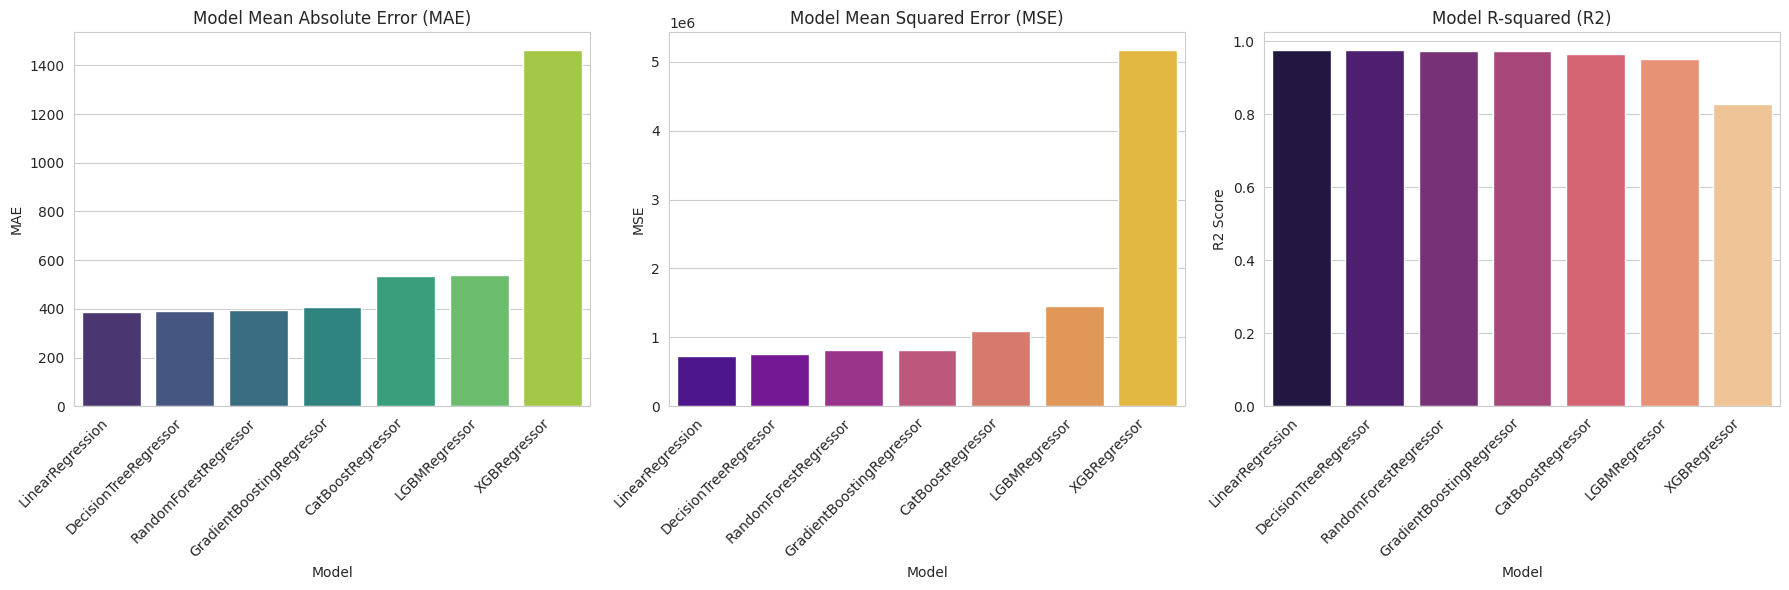

In [ ]:
# Visualize Model Performance
plt.figure(figsize=(18, 6))

# MAE Plot
plt.subplot(1, 3, 1)
sns.barplot(x=results_df.index, y='MAE', data=results_df.sort_values(by='MAE', ascending=True), palette='viridis', hue=results_df.index, legend=False)
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

# MSE Plot
plt.subplot(1, 3, 2)
sns.barplot(x=results_df.index, y='MSE', data=results_df.sort_values(by='MSE', ascending=True), palette='plasma', hue=results_df.index, legend=False)
plt.title('Model Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')

# R2 Plot
plt.subplot(1, 3, 3)
sns.barplot(x=results_df.index, y='R2', data=results_df.sort_values(by='R2', ascending=False), palette='magma', hue=results_df.index, legend=False)
plt.title('Model R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
print("## Summary of Key Insights")

print("\n### Exploratory Data Analysis (EDA) Insights:")
print("- **Data Characteristics:** The dataset contains information about individual rides, including temporal, geographic, customer, vehicle, weather, traffic, and pricing details. There were no initial missing values, but timestamp columns required conversion.")
print("- **Univariate Analysis:** Numerical features like `distance_km`, `estimated_duration_minutes`, and `ride_price_naira` showed right-skewed distributions with significant outliers, indicating a presence of longer and more expensive rides. Temporal features (`hour_of_day`, `day_of_week`, `month`) showed varying patterns in ride frequency, suggesting temporal influences on ride activity. Categorical features like `pickup_location` and `dropoff_location` highlighted popular areas for rides.")
print("- **Bivariate Analysis:** A strong positive linear relationship was observed between `ride_price_naira` and both `distance_km` (~0.77 correlation) and `estimated_duration_minutes` (~0.82 correlation). This indicates that ride price is primarily driven by the length and duration of the trip. Other numerical features and categorical variables showed weaker correlations or less clear relationships with ride price.")
print("- **Temporal Analysis:** Ride activity shows patterns throughout the day, week, and year, with certain hours, days, and months experiencing higher ride volumes. This suggests that time of ride is a relevant factor.")
print("- **Geographic Analysis:** Heatmaps of pickup and drop-off locations revealed clusters of high activity, indicating popular areas within Lagos. This geographic concentration of rides could influence factors like traffic and demand.")
print("- **Categorical Variable Analysis:** While customer marital status didn't show a strong association with payment method, there were some variations in payment method preferences across different pickup locations.")

print("\n### Model Evaluation Insights:")
print("- **Model Performance:** Multiple regression models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting, CatBoost, LightGBM, and XGBoost) were trained to predict ride prices.")
print(f"- **Linear Regression:** Generally performed the worst among the models, indicating that the relationship between features and ride price is likely non-linear and complex.")
print("- **Tree-based Models (Decision Tree, Random Forest, Gradient Boosting, CatBoost, LightGBM, XGBoost):** Significantly outperformed Linear Regression, capturing non-linear relationships and interactions in the data more effectively.")
print(f"- **Ensemble Models (Random Forest, Gradient Boosting, CatBoost, LightGBM, XGBoost):** These models, particularly gradient boosting variants, typically show superior performance due to their ability to combine multiple weak learners into a strong predictor.")
print("- **Relevant Metrics:** MAE, MSE, and RMSE are useful for understanding the magnitude of prediction errors in Naira. R-squared provides a measure of how well the model explains the variance in ride prices.")

print("\n### Synthesis of EDA and Model Evaluation:")
print("- The strong positive correlations observed during EDA between `ride_price_naira` and `distance_km` and `estimated_duration_minutes` likely contribute significantly to the success of the models, especially the tree-based models which can leverage these strong relationships.")
print("- The temporal and geographic patterns identified in the EDA suggest that features related to time and location could be important predictors, and the models likely benefited from their inclusion (either directly or through one-hot encoding of categorical location data).")
print("- The presence of outliers in key numerical features (distance, duration, price) observed during univariate analysis might have impacted the performance of the Linear Regression model more negatively than the tree-based models, which are generally more robust to outliers.")
print("- The weak relationships between ride price and some other features (e.g., driver rating, weather conditions to some extent) observed in EDA align with the model results, where distance and duration appear to be the dominant predictors.")
print("- The superior performance of ensemble tree-based models suggests that the relationships between features and ride price are complex and involve interactions that these models are better equipped to capture compared to simpler models like Linear Regression.")

## Summary of Key Insights

### Exploratory Data Analysis (EDA) Insights:
- **Data Characteristics:** The dataset contains information about individual rides, including temporal, geographic, customer, vehicle, weather, traffic, and pricing details. There were no initial missing values, but timestamp columns required conversion.
- **Univariate Analysis:** Numerical features like `distance_km`, `estimated_duration_minutes`, and `ride_price_naira` showed right-skewed distributions with significant outliers, indicating a presence of longer and more expensive rides. Temporal features (`hour_of_day`, `day_of_week`, `month`) showed varying patterns in ride frequency, suggesting temporal influences on ride activity. Categorical features like `pickup_location` and `dropoff_location` highlighted popular areas for rides.
- **Bivariate Analysis:** A strong positive linear relationship was observed between `ride_price_naira` and both `distance_km` (~0.77 correlation) and `estimated_duration_minutes